In [1]:
# importing the necessary packages
import pandas as pd
import missingno as msno
import sweetviz as sv
from pandas_dq import dq_report

Imported pandas_dq (1.22). Always upgrade to get latest features.



In [2]:
#loading the dataset
qual =pd.read_excel('baseline script trial.xlsx')

#viewing part of the dataset
qual.head()

SubmissionDate               starttime           \
0  2023-05-22T15:15:32.074Z  2023-05-22T09:15:57.277+01   
1  2023-05-22T15:15:32.955Z  2023-05-22T10:04:06.788+01   
2  2023-05-22T15:15:34.477Z  2023-05-22T11:51:36.681+01   
3  2023-05-22T15:15:33.657Z  2023-05-22T10:46:15.271+01   
4  2023-05-22T15:15:35.351Z                         NaN   

            endtime            \
0  2023-05-22T17:32:18.096+01   
1  2023-05-22T17:32:39.767+01   
2  2023-05-22T17:31:46.998+01   
3  2023-05-22T17:33:02.342+01   
4  2023-05-22T17:33:16.977+01   

                     device_info                     duration gpscordinates  \
0  CM465|CM465|5.1|SurveyCTO Collect 2.72 (e009c12)    2465         NaN       
1  CM465|CM465|5.1|SurveyCTO Collect 2.72 (e009c12)    1629         NaN       
2  CM465|CM465|5.1|SurveyCTO Collect 2.72 (e009c12)    1603         NaN       
3  CM465|CM465|5.1|SurveyCTO Collect 2.72 (e009c12)    1768         NaN       
4  CM465|CM465|5.1|SurveyCTO Collect 2.72 (e009c12)    1243         NaN       

          hip12                         area                 Gender  \
0  Emmanuel Twinamatsiko  Bwindi Impenetrable National Park    Male   
1  Emmanuel Twinamatsiko  Bwindi Impenetrable National Park    Male   
2  Emmanuel Twinamatsiko  Bwindi Impenetrable National Park    Male   
3  Emmanuel Twinamatsiko  Bwindi Impenetrable National Park    Male   
4  Emmanuel Twinamatsiko  Bwindi Impenetrable National Park  Female   

        Age        prequestion question  consent  hip01 hip02 hip03 hip04  \
0  Above 64 years      2.0        NaN       1       1     C2    S3    P5    
1     36-64 years      2.0        NaN       1       1     C2    S3    P5    
2     36-64 years      2.0        NaN       1       1     C2    S3    P5    
3     36-64 years      2.0        NaN       1       1     C2    S3    P5    
4  Above 64 years      2.0        NaN       1       1     C2    S3    P5    

     hip05      Interview lang   hip13_1 hip15  hip17  hip18  hip19 hip06   \
0  Nyakabingo  Runyankole/Rukiga    NaN    Yes   NaN    NaN    NaN   Rural   
1  Nyakabingo  Runyankole/Rukiga    NaN    Yes   NaN    NaN    NaN   Rural   
2  Nyakabingo  Runyankole/Rukiga    NaN     No   1.0    1.0   32.0   Rural   
3  Nyakabingo  Runyankole/Rukiga    NaN     No   1.0    1.0   34.0   Rural   
4  Nyakabingo  Runyankole/Rukiga    NaN    Yes   NaN    NaN    NaN   Rural   

   hip07  hip08  hip09  Total_Check  hip10   hip11   hip11_1  \
0    8      5      3         8       Father  English    NaN    
1    9      4      5         9       Father   Rukiga    NaN    
2    5      2      3         5       Father   Rukiga    NaN    
3    5      2      3         5       Father   Rukiga    NaN    
4    3      1      2         3       Mother   Rukiga    NaN    

              hc03                     hc04          \
0  Tertiary/Diploma/University           3 Children   
1                 Some Primary  6 Children and more   
2  Tertiary/Diploma/University           3 Children   
3  Tertiary/Diploma/University           3 Children   
4                 Some Primary              1 Child   

                 hc05                           hc06              \
0  Agricultural and fishery workers  Tertiary,Diploma,University   
1  Agricultural and fishery workers                 Some Primary   
2         Craft and related workers            Completed Primary   
3                            Clerks  Tertiary,Diploma,University   
4  Agricultural and fishery workers               Not applicable   

                 hc07               hc08    hc08_1         hc09       hc09_1  \
0  Agricultural and Fishery workers   No         NaN               No   NaN    
1  Agricultural and Fishery workers   No         NaN               No   NaN    
2  Agricultural and Fishery workers   No         NaN               No   NaN    
3                            Clerks   No         NaN               No   NaN    
4                    Not applicable  Yes  Hip injury  Not  applicable   NaN    

   hc115  hc10

In [3]:
#converting columns hc30,hc39,hc41_1,hc59 to string
qual['hc30'] = qual['hc30'].astype(str)
qual['hc39'] = qual['hc39'].astype(str)
qual['hc41_1'] = qual['hc41_1'].astype(str)
qual['hc59'] = qual['hc59'].astype(str)


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\LENEVO\anaconda3\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
c:\Users\LENEVO\anaconda3\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()



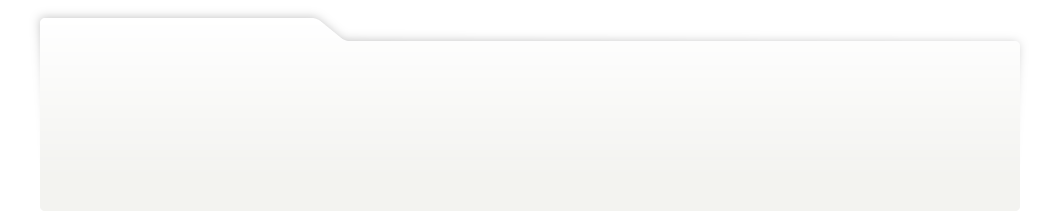
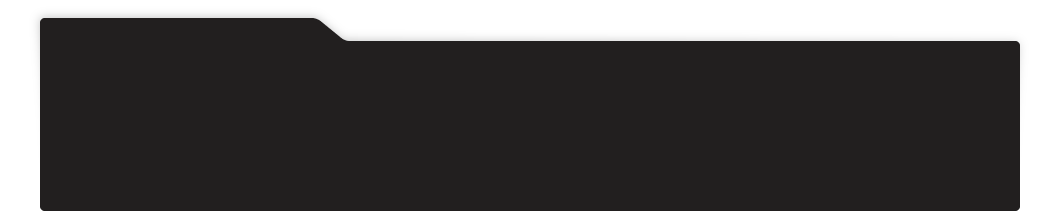
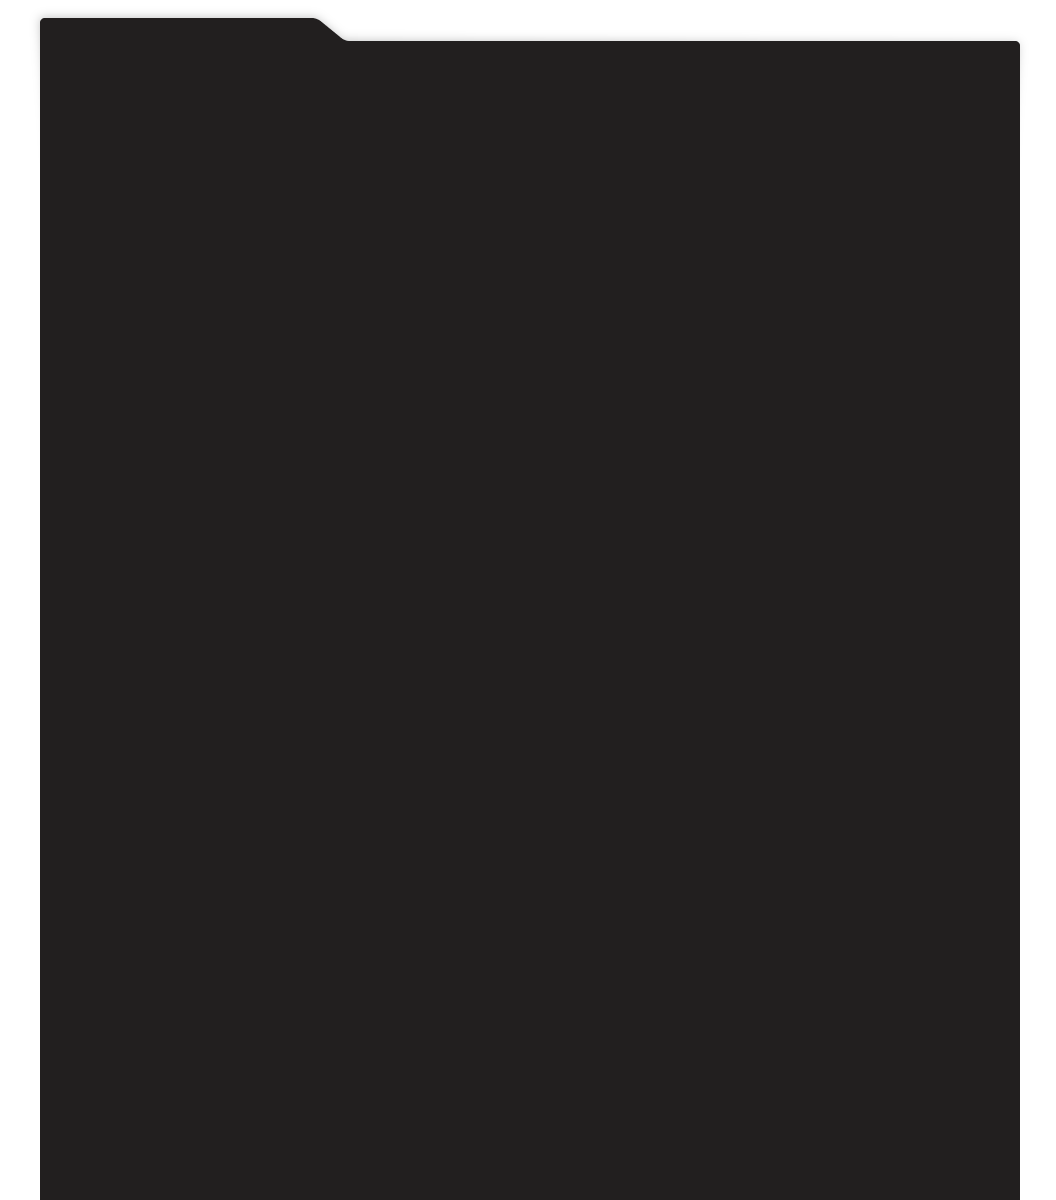
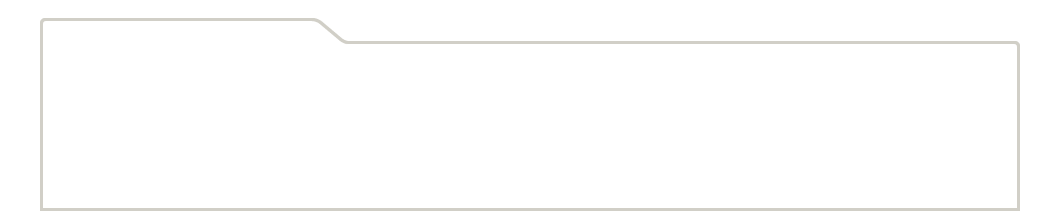
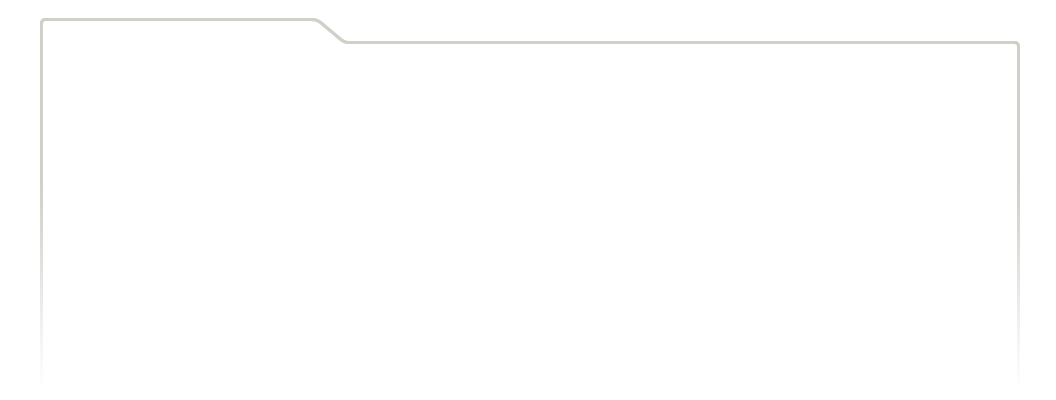
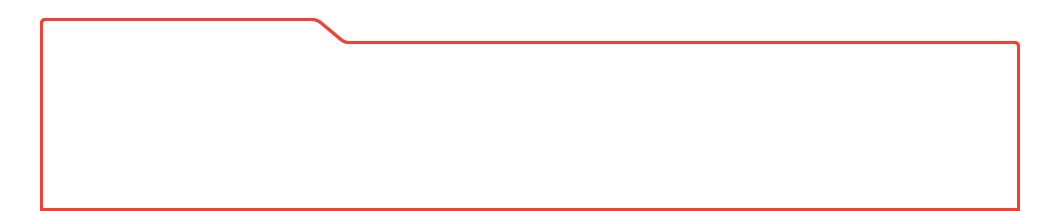
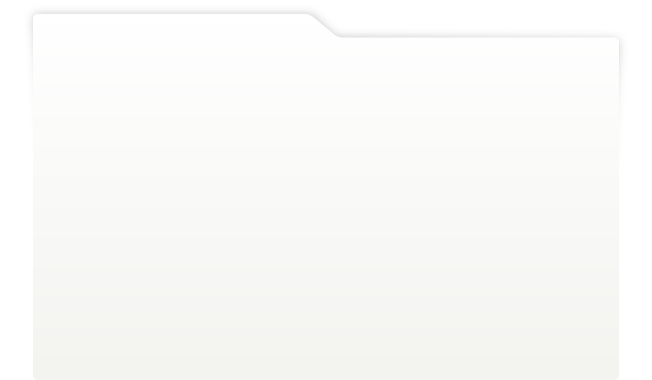
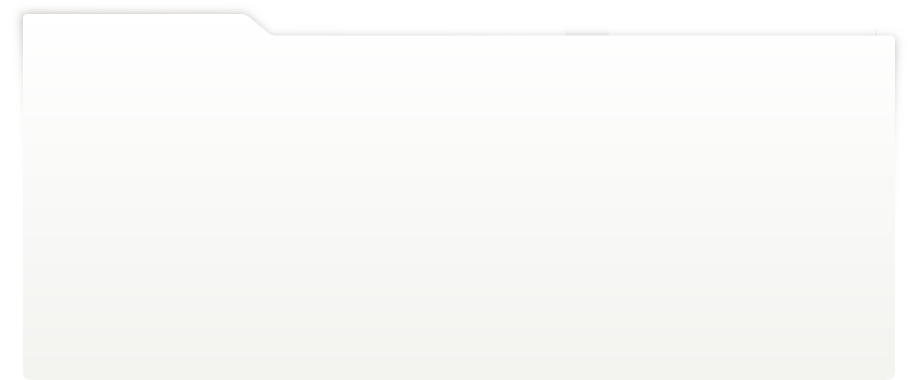
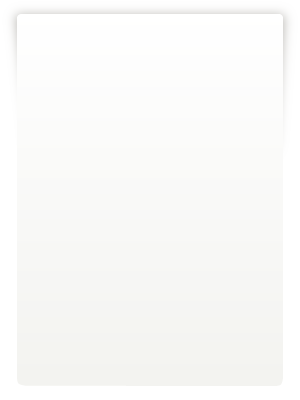
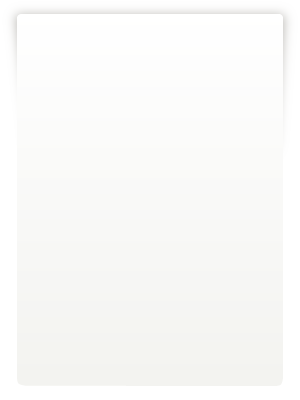
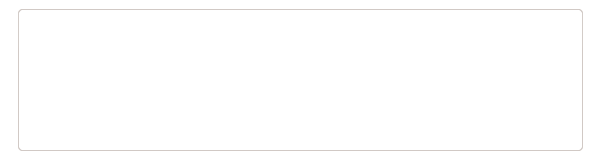
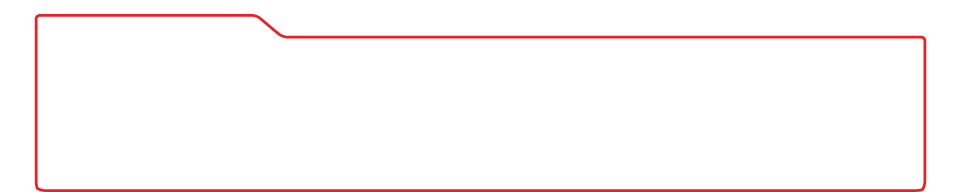
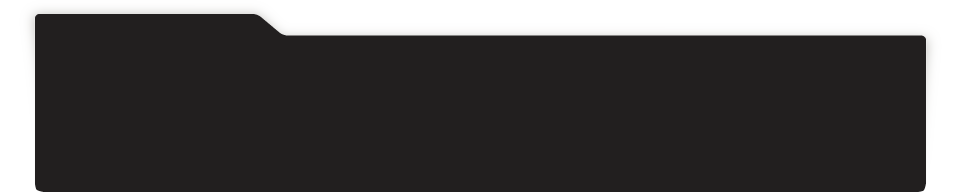
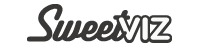
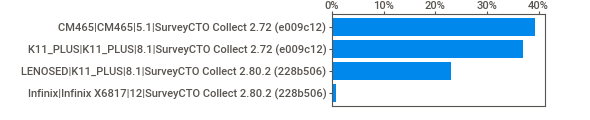
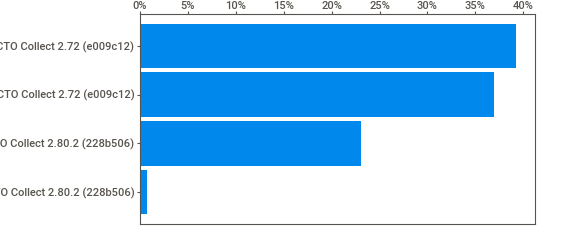
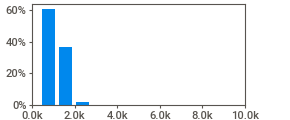
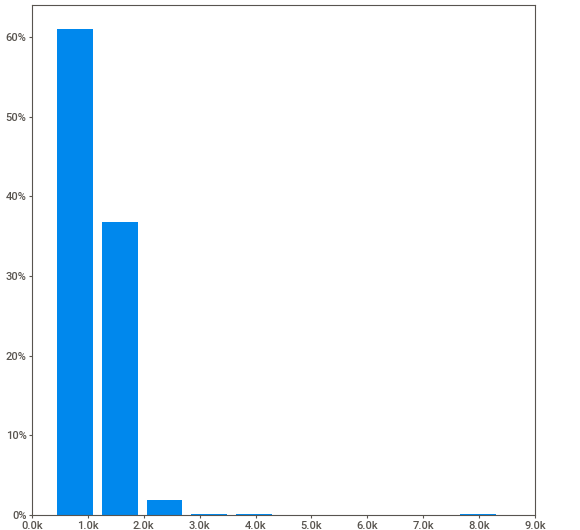
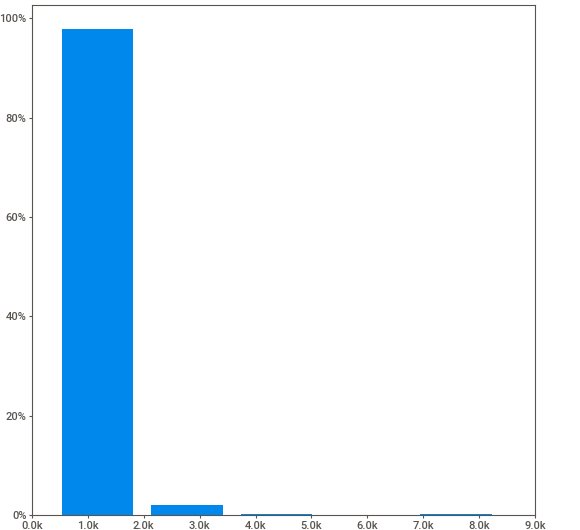
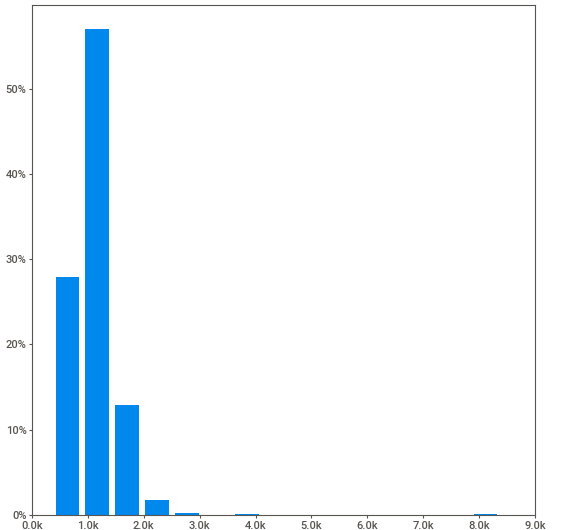
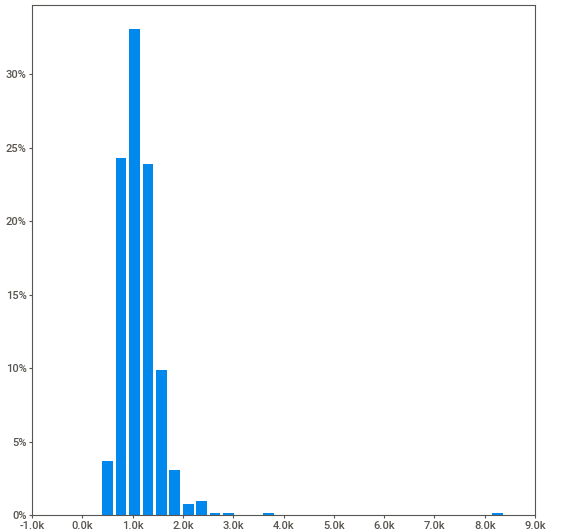
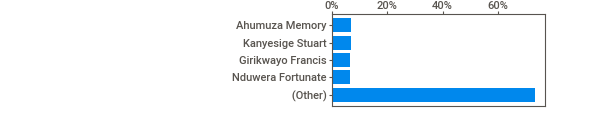
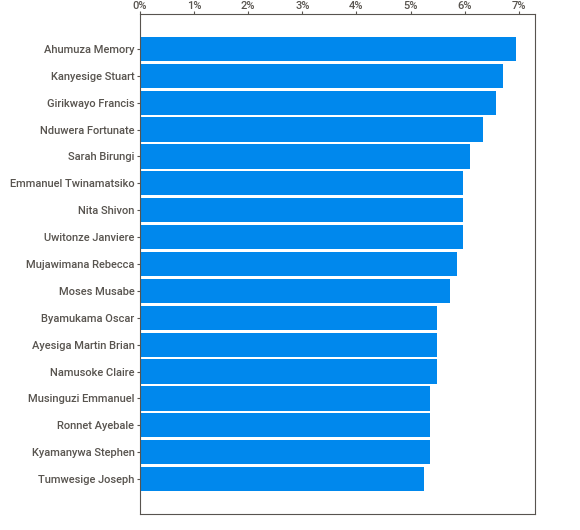
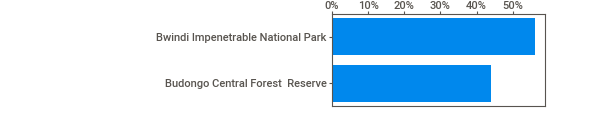
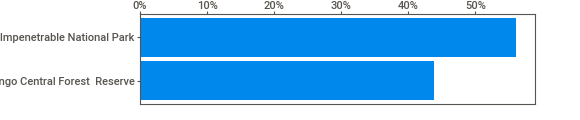
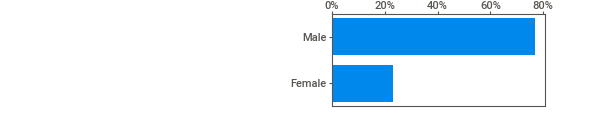
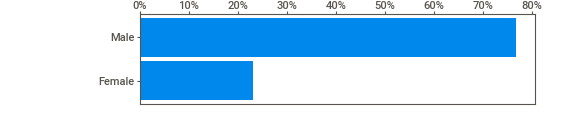
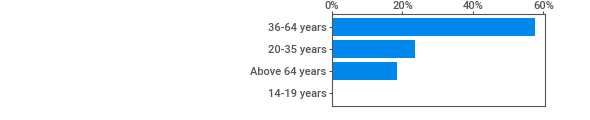
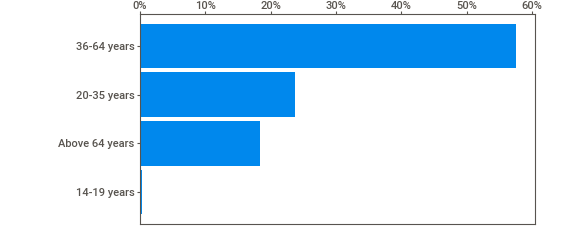
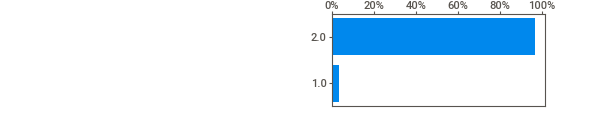
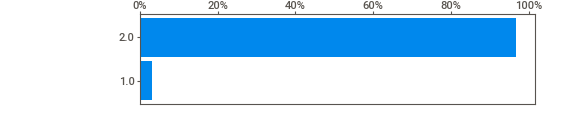
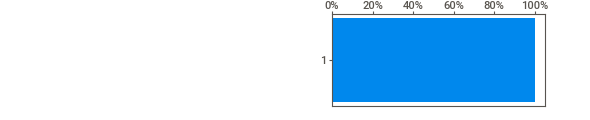
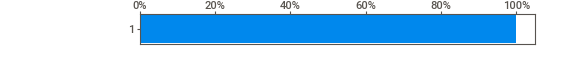
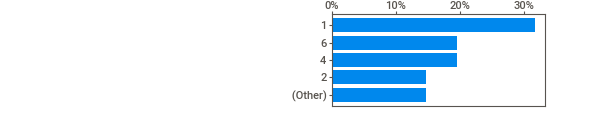
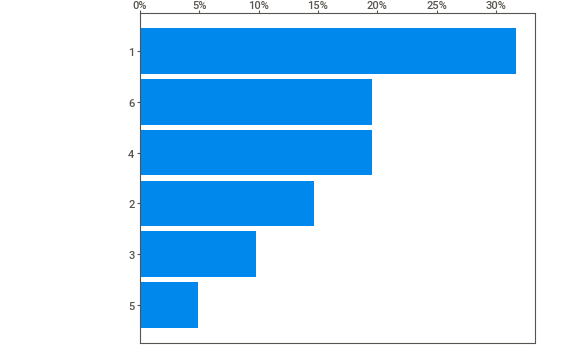
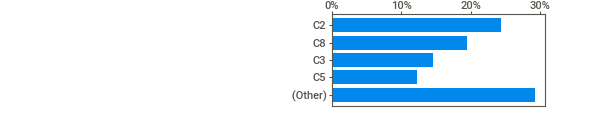
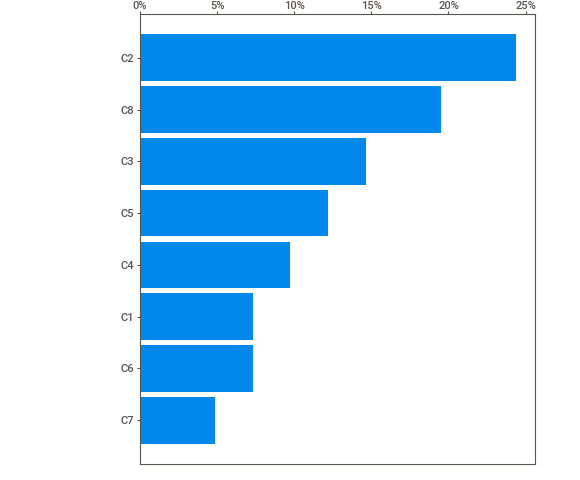
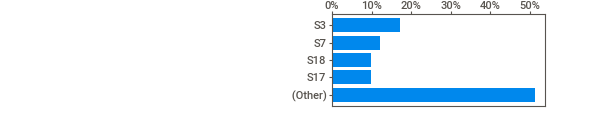
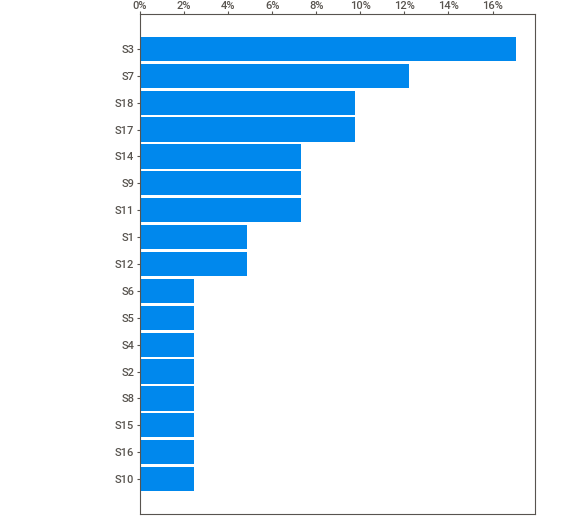
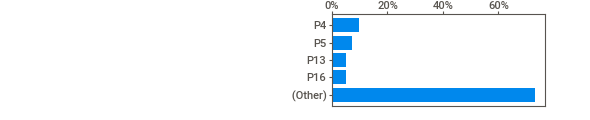
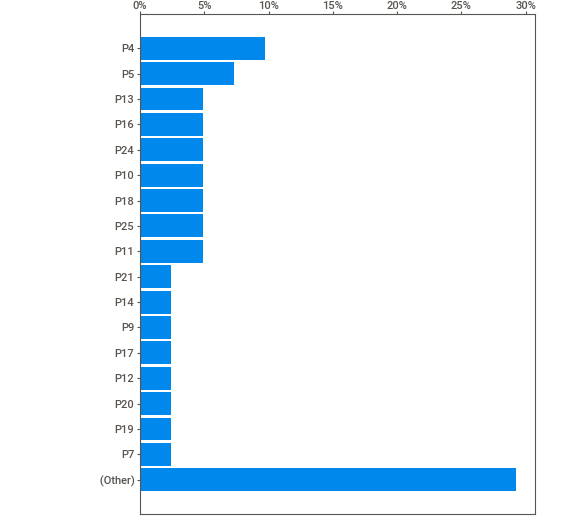
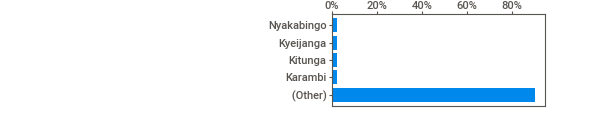
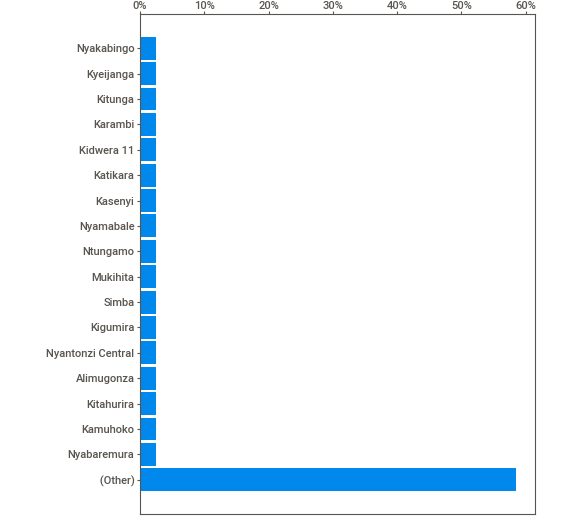
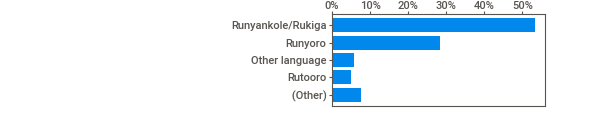
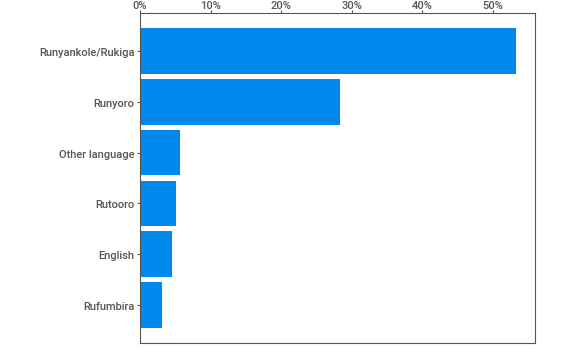
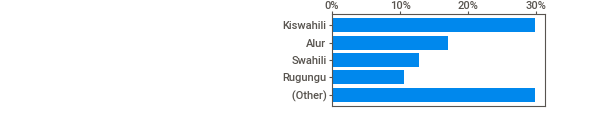
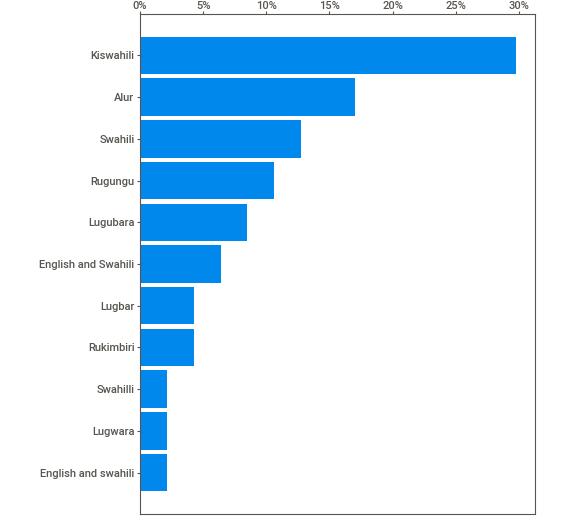
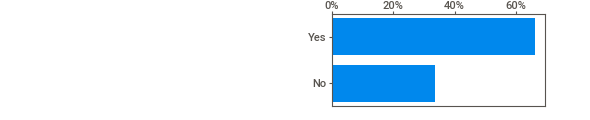
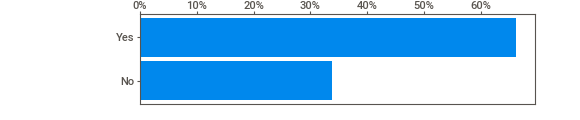
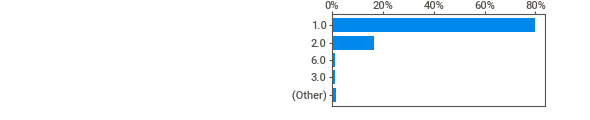
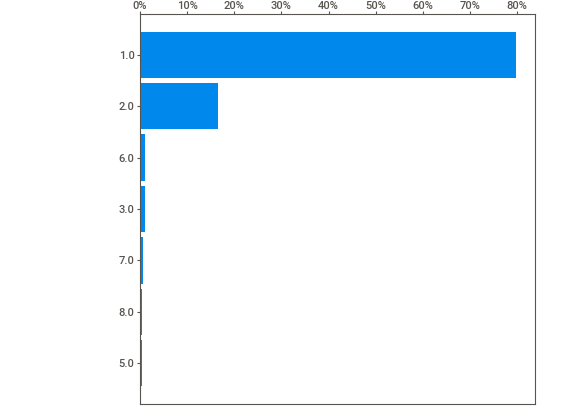
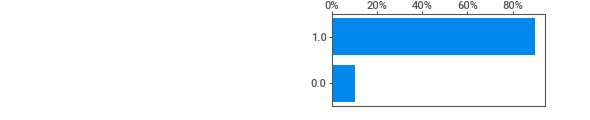
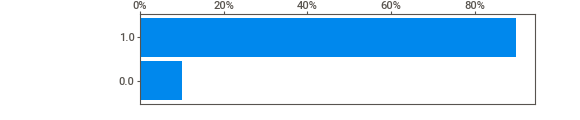
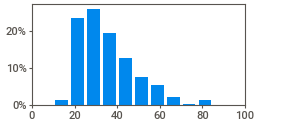
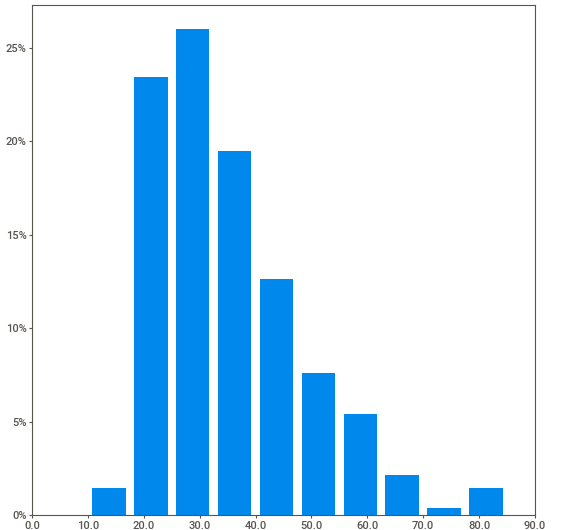
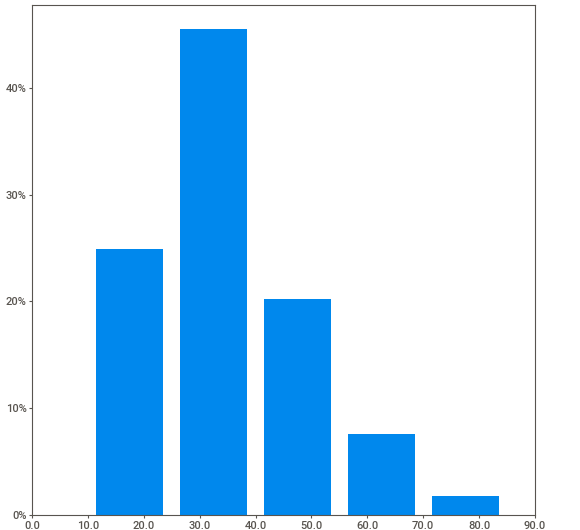
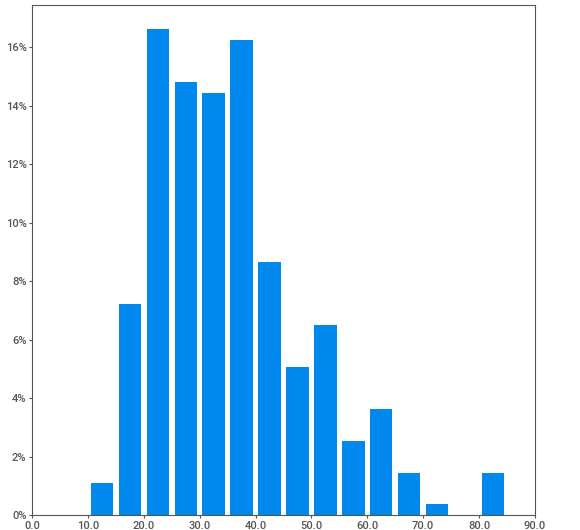
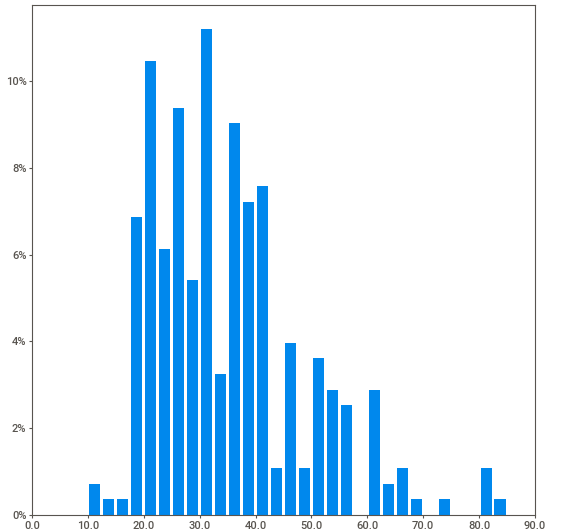
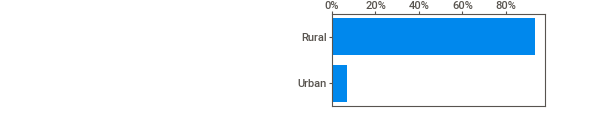
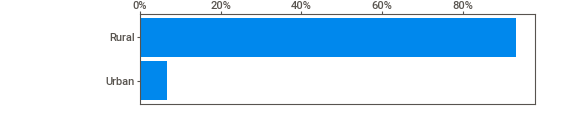
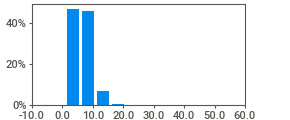
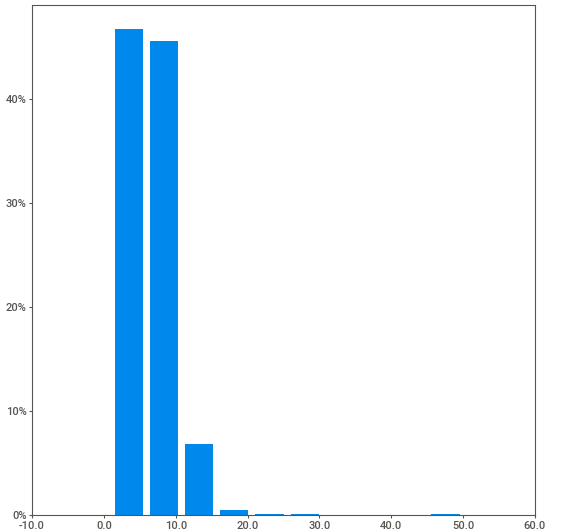
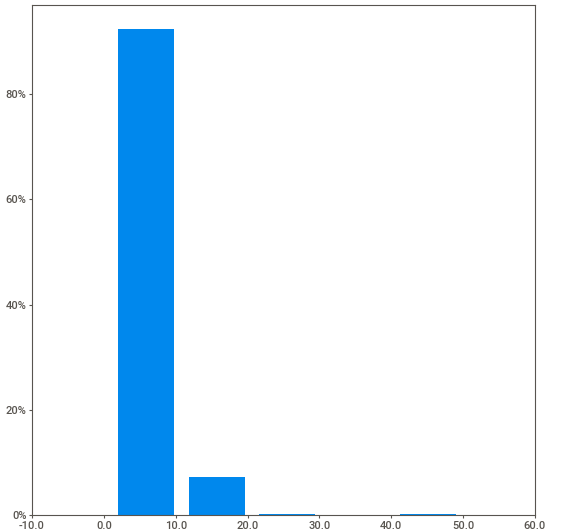
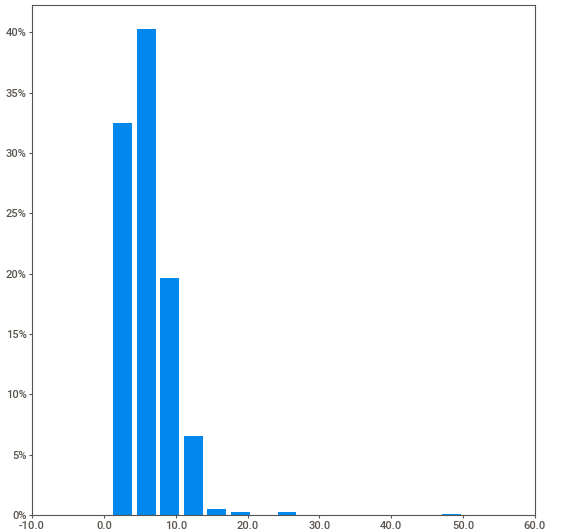
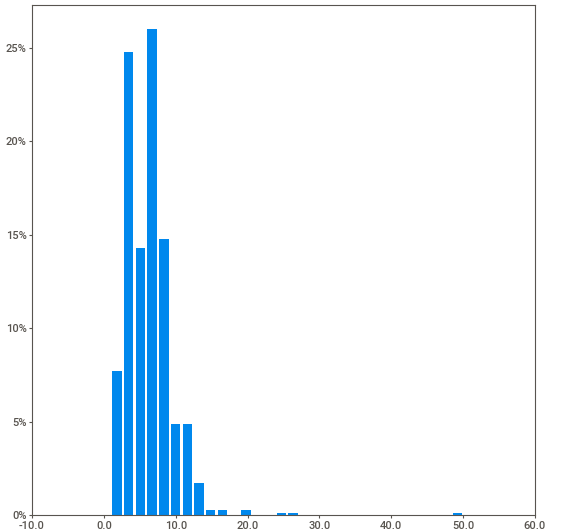
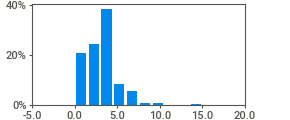
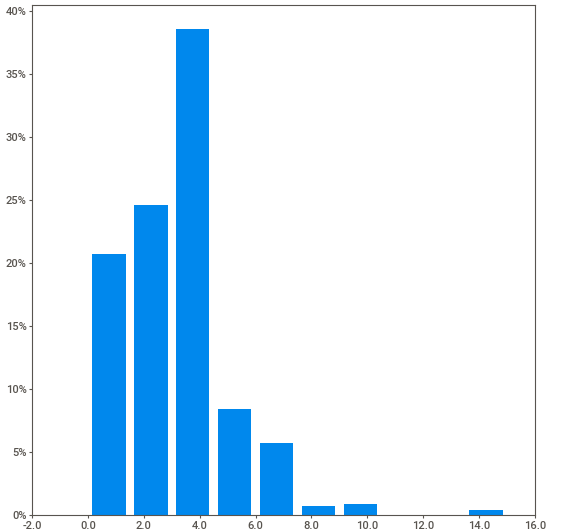
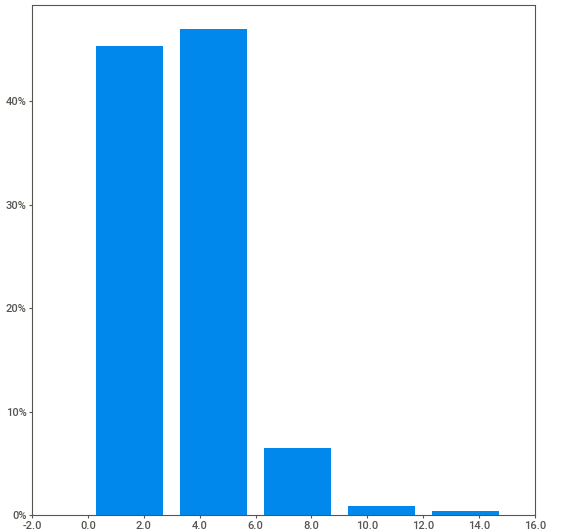
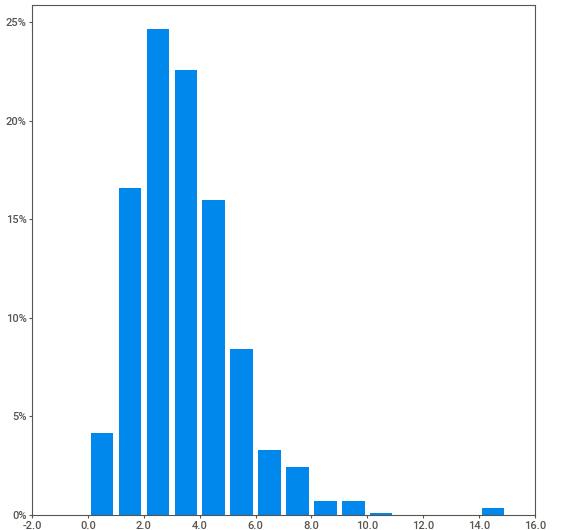
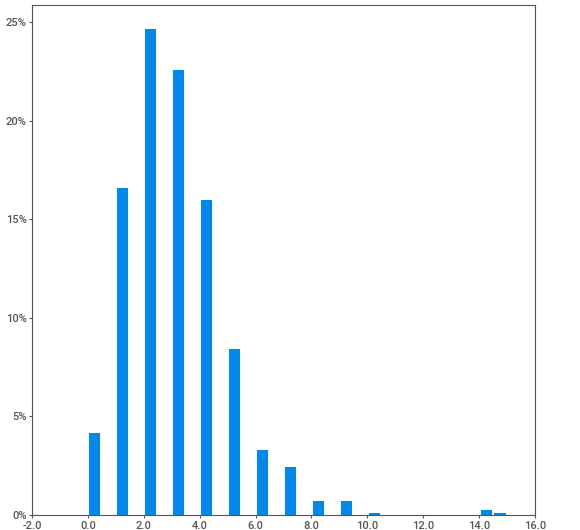
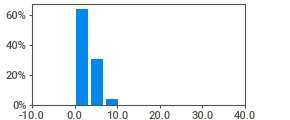
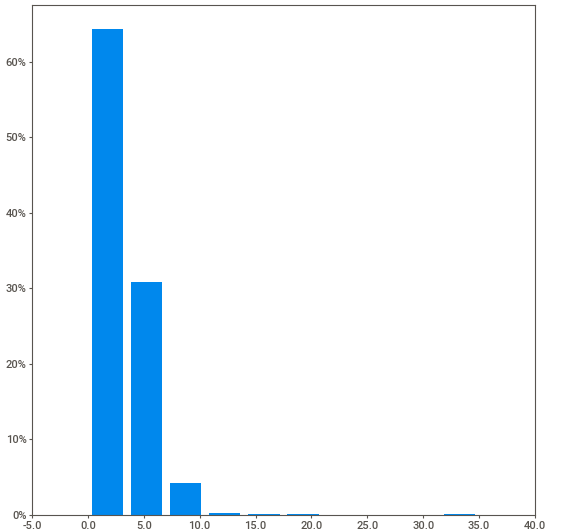
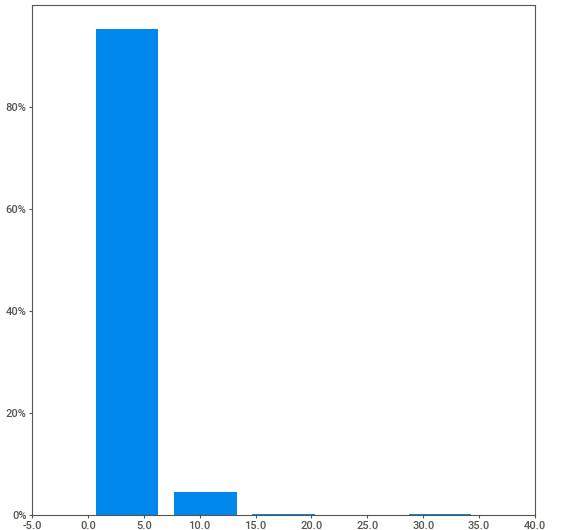
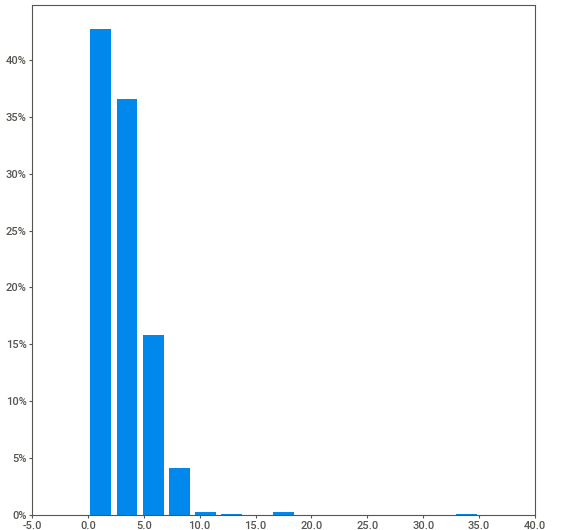
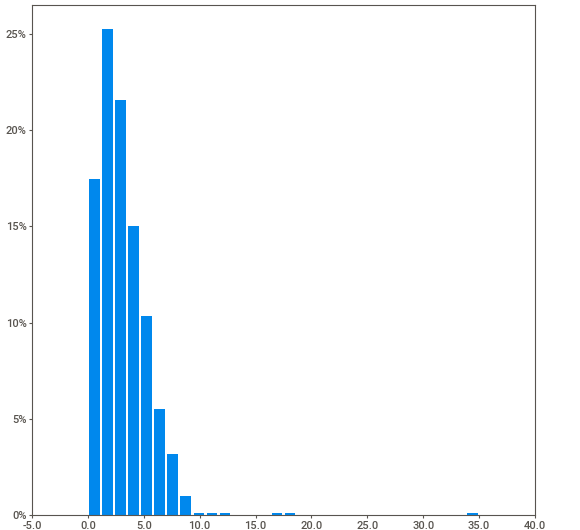
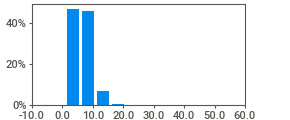
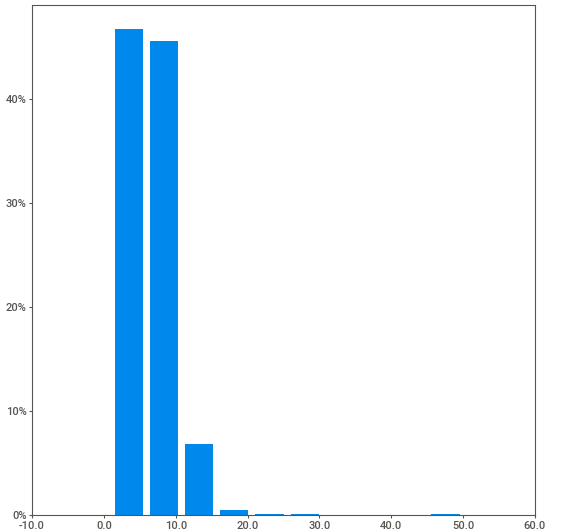
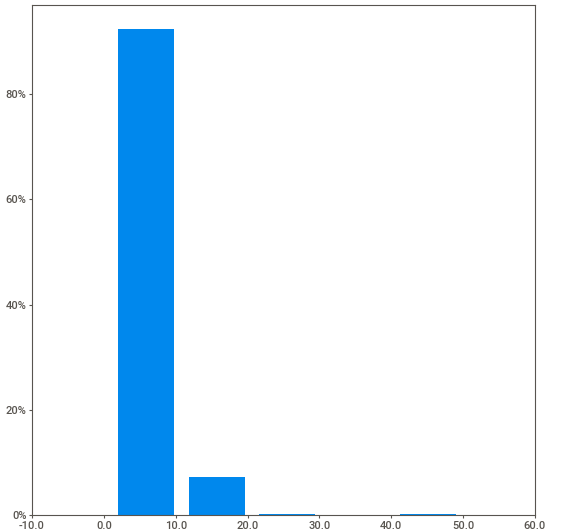
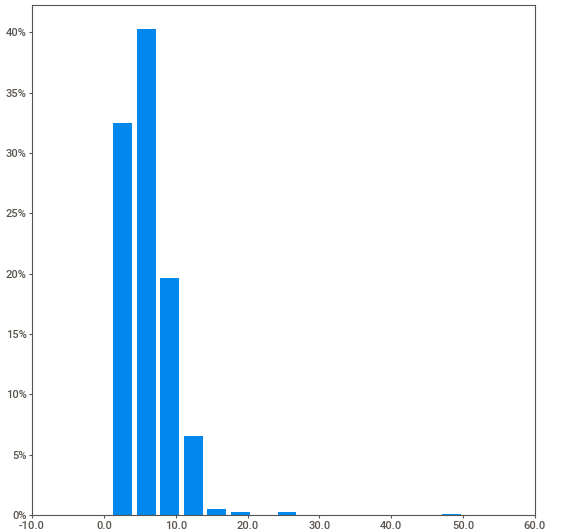
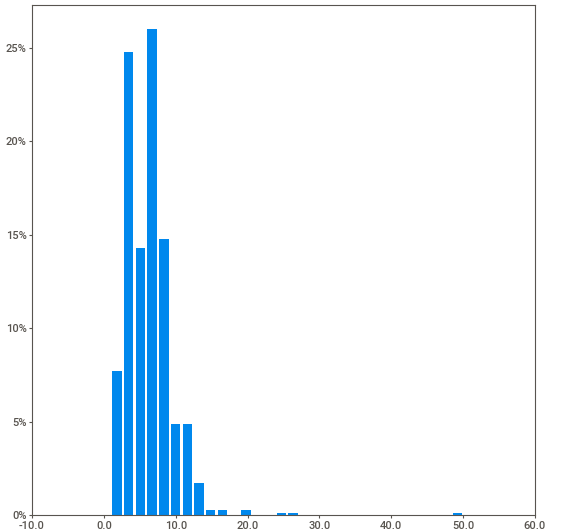
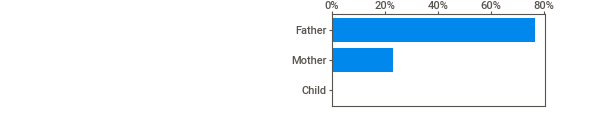
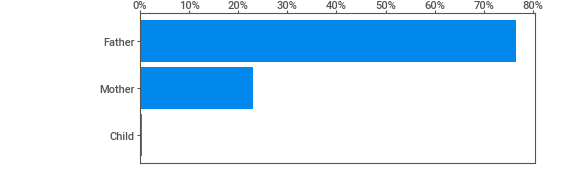
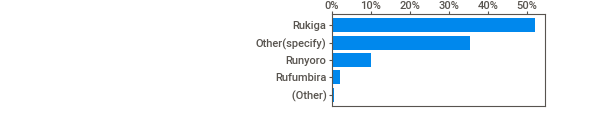
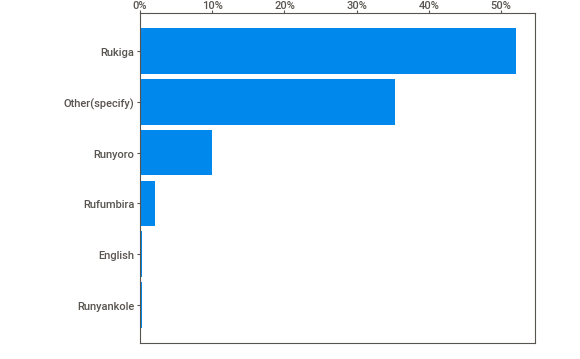
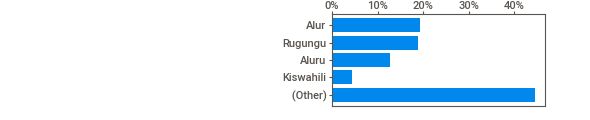
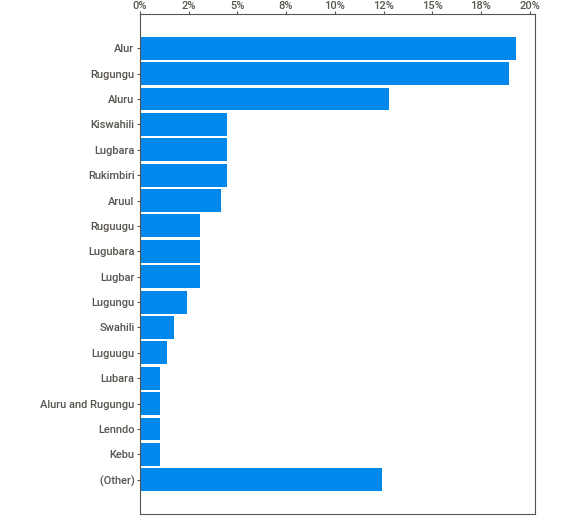
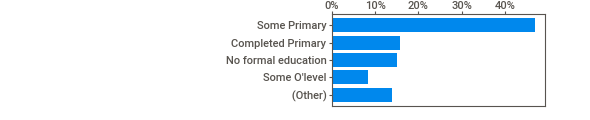
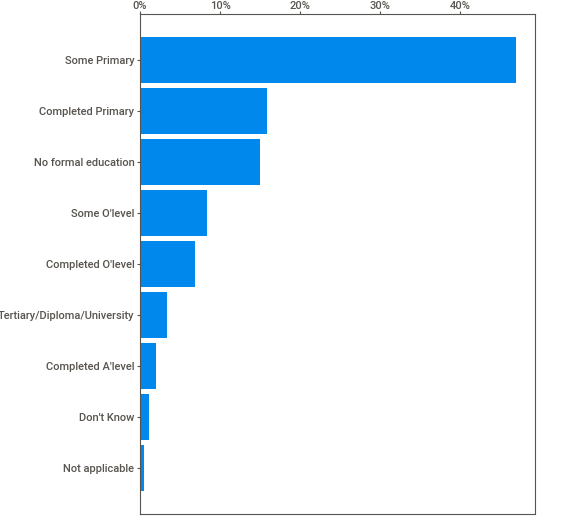
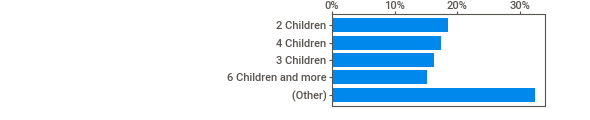
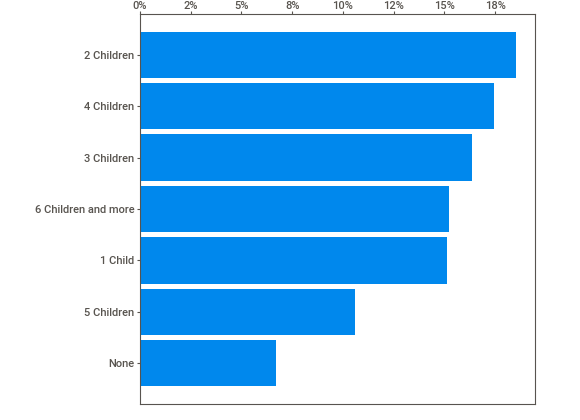
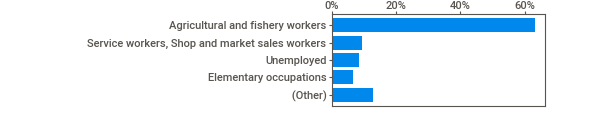
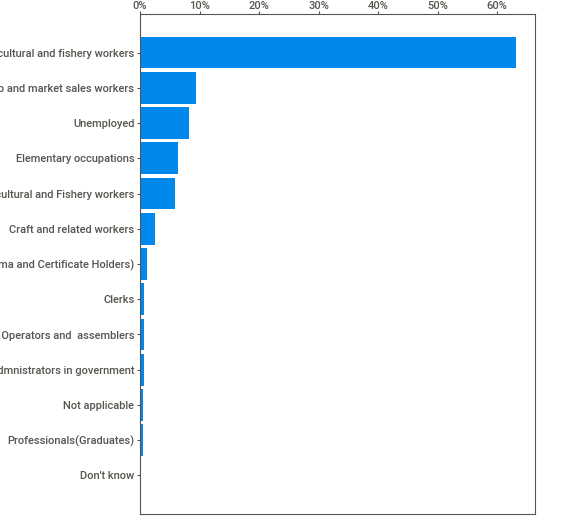
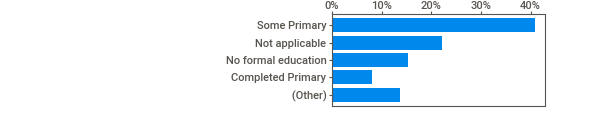
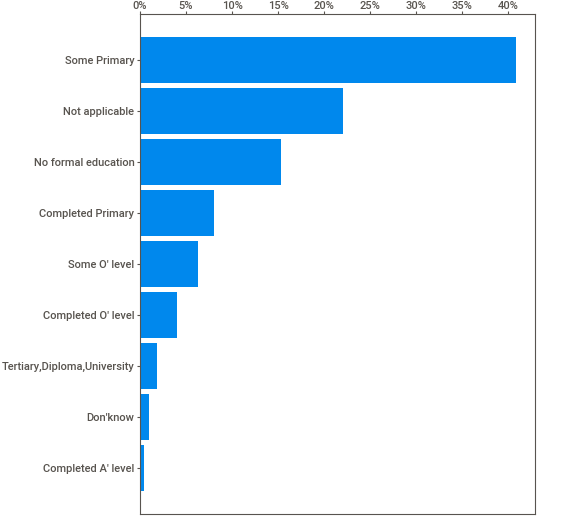
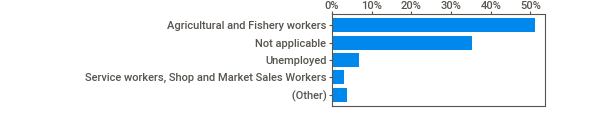
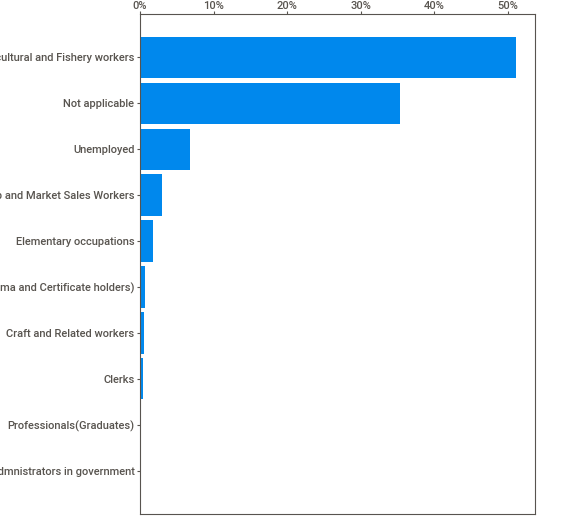
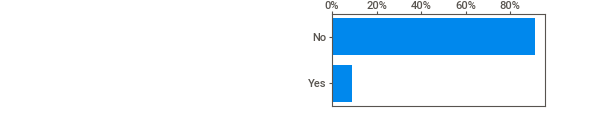
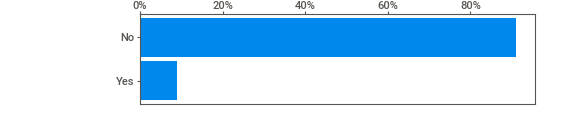
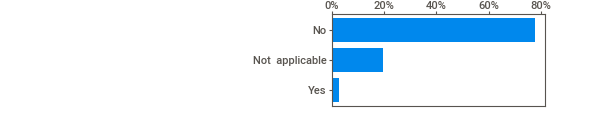
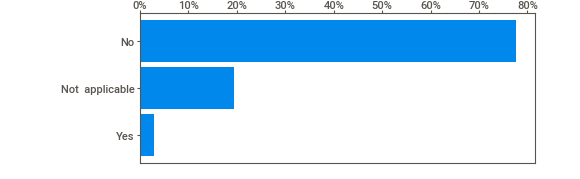
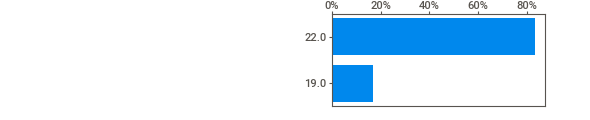
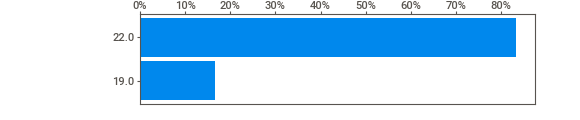
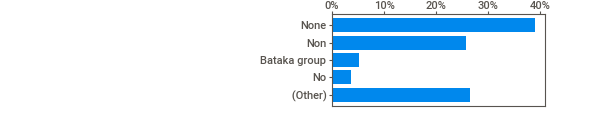
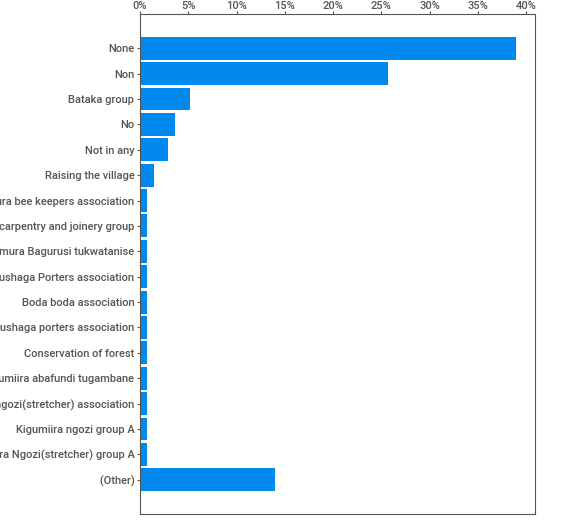
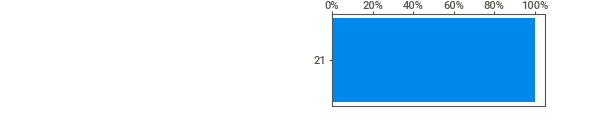
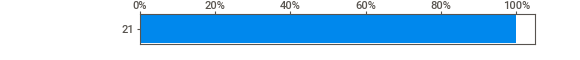
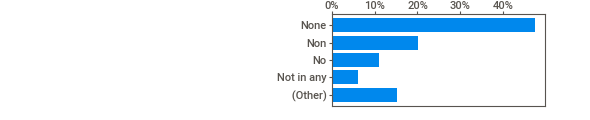
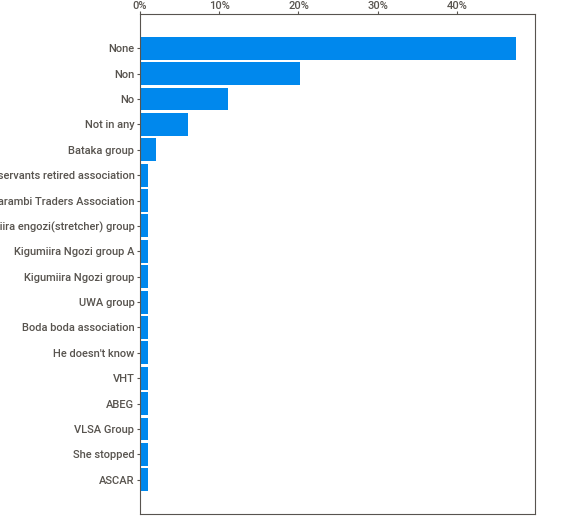
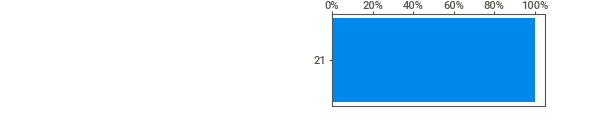
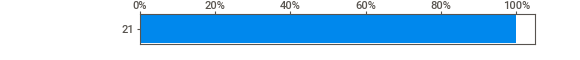
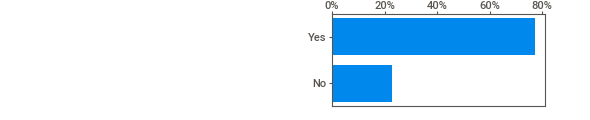
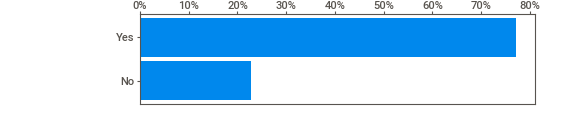
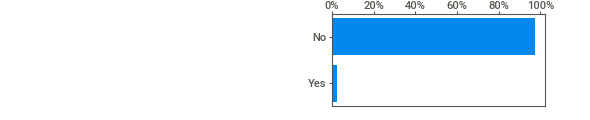
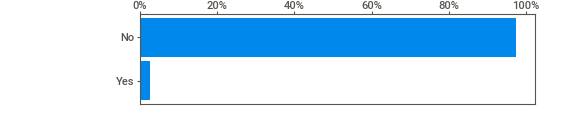
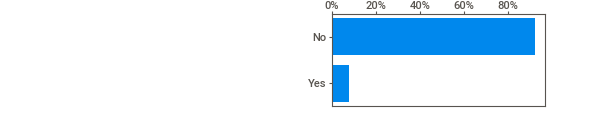
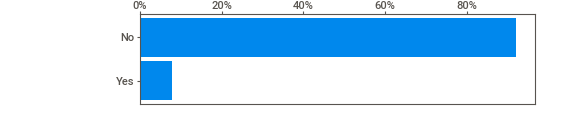
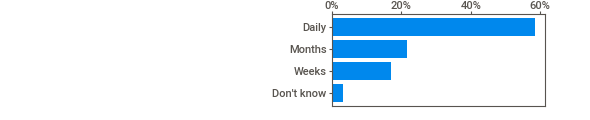
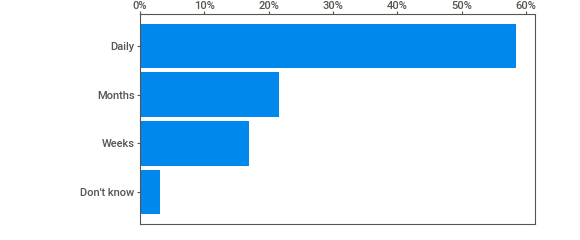
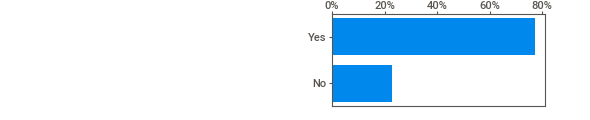
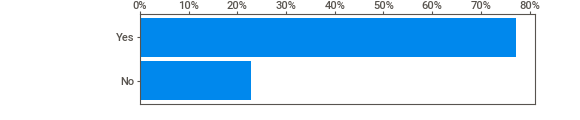
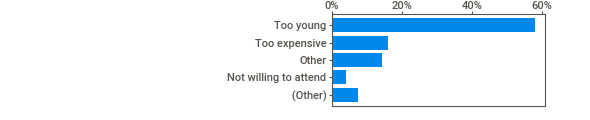
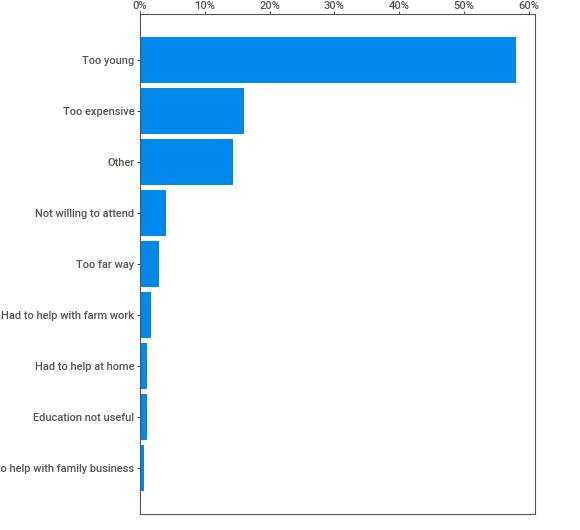
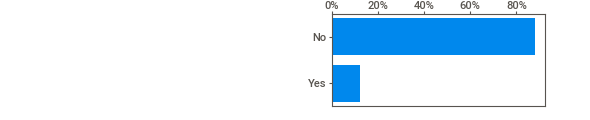
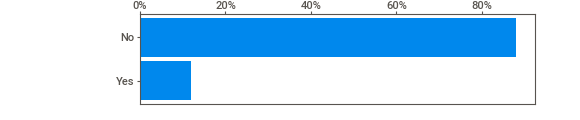
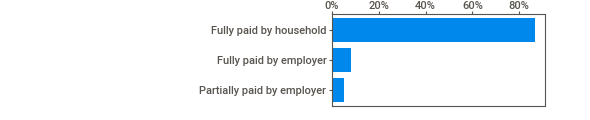
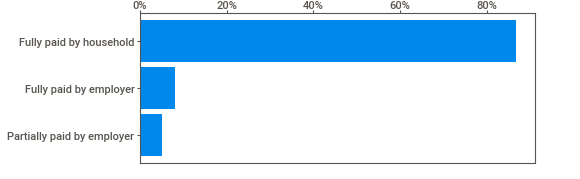
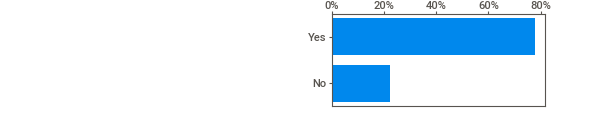
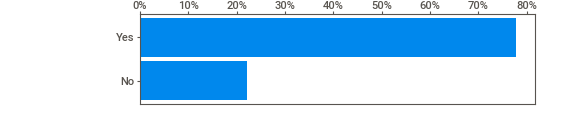
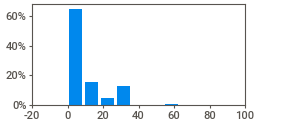
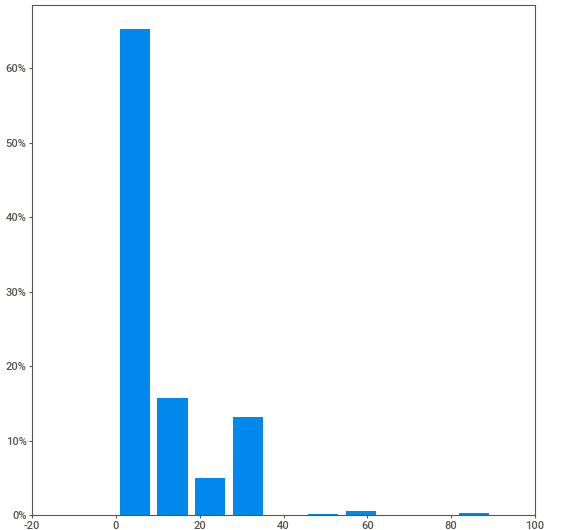
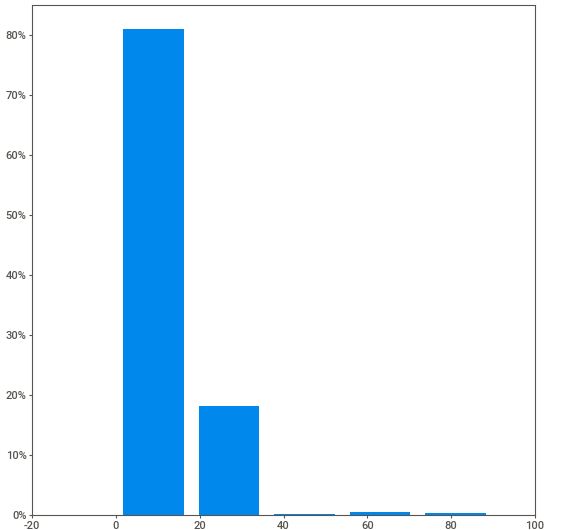
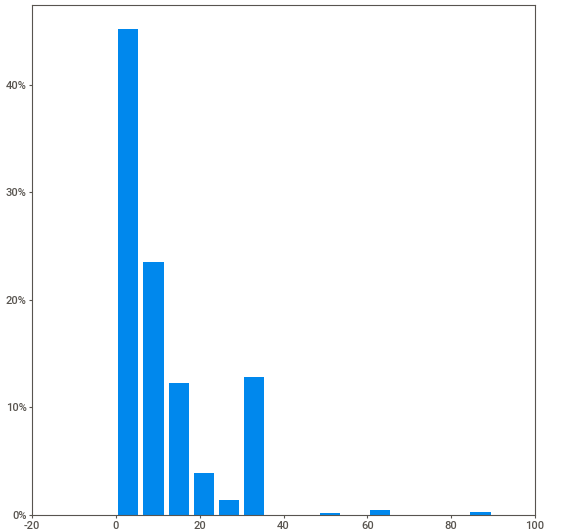
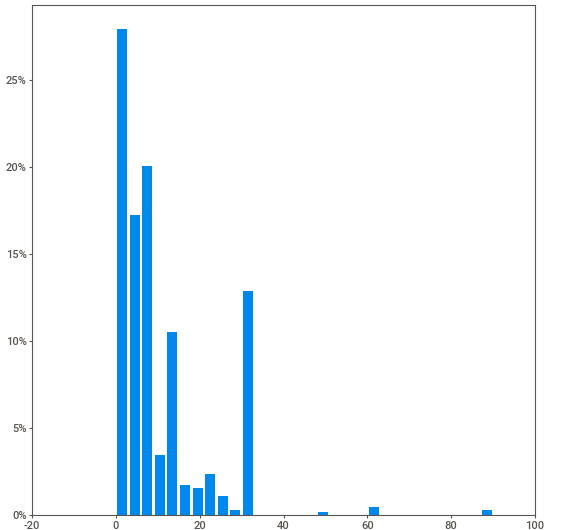
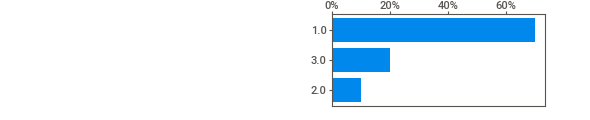
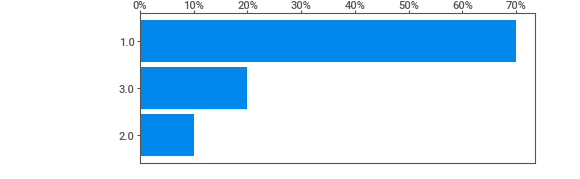
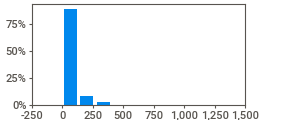
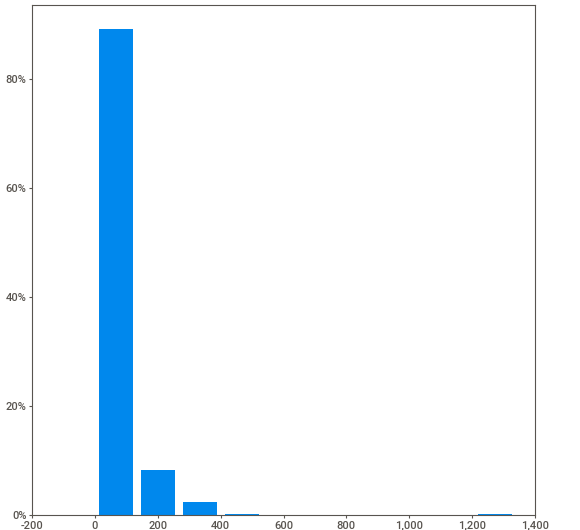
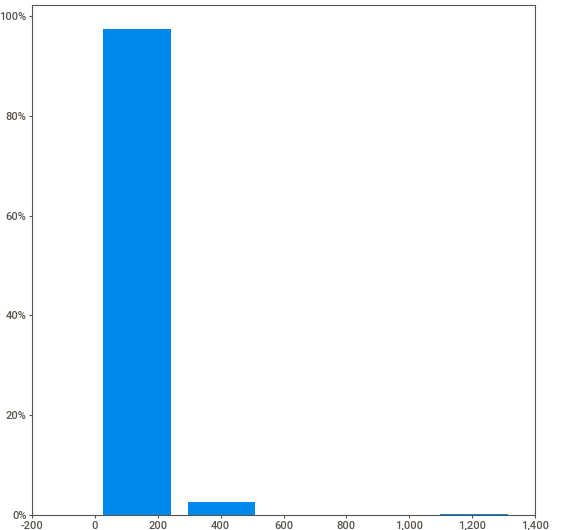
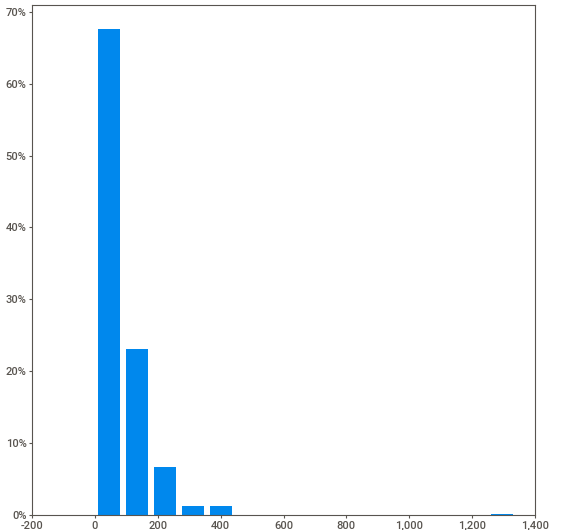
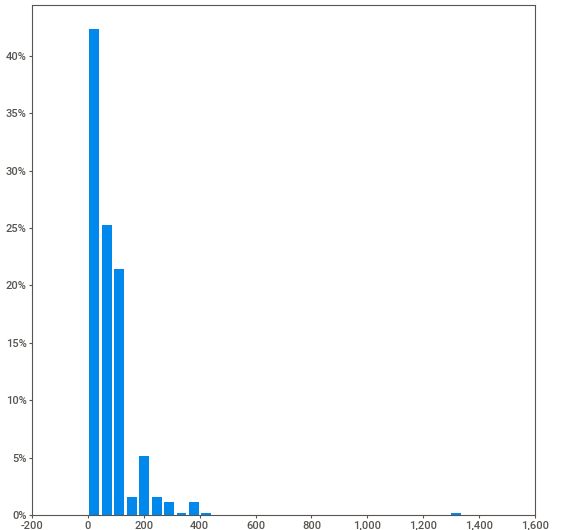
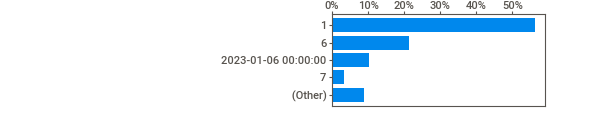
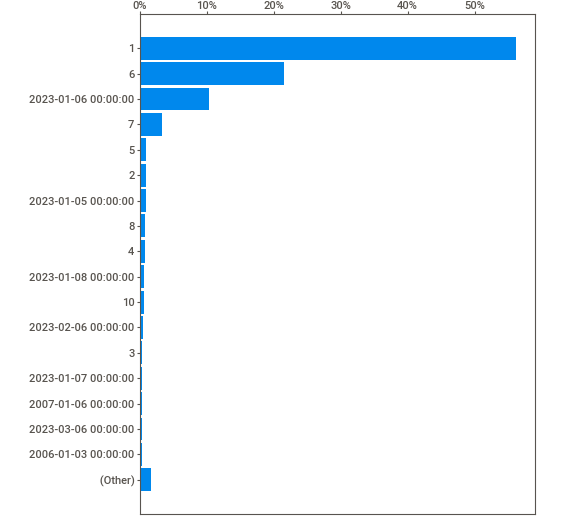
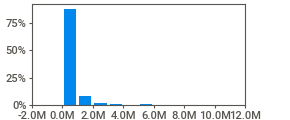
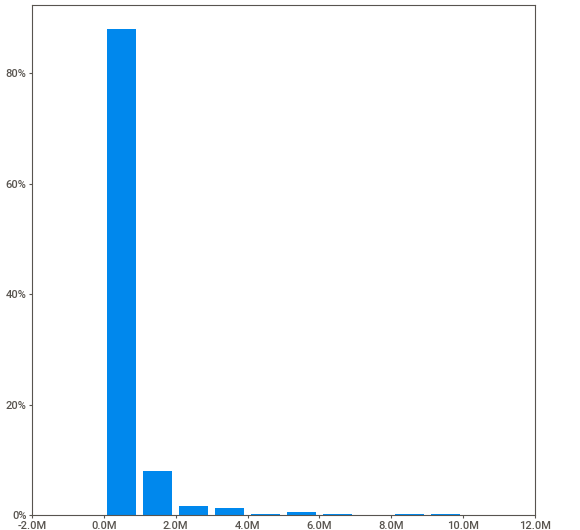
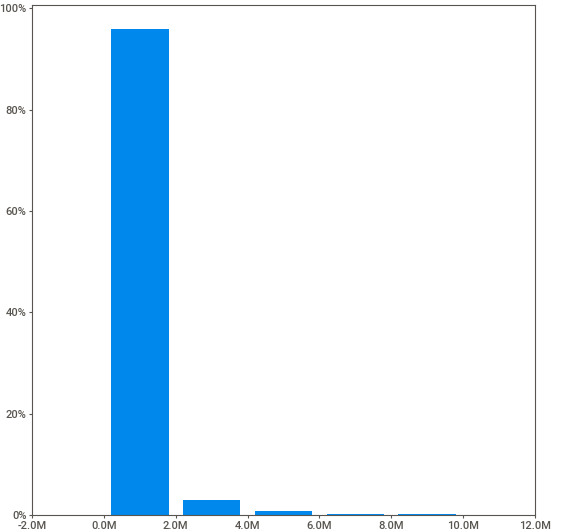
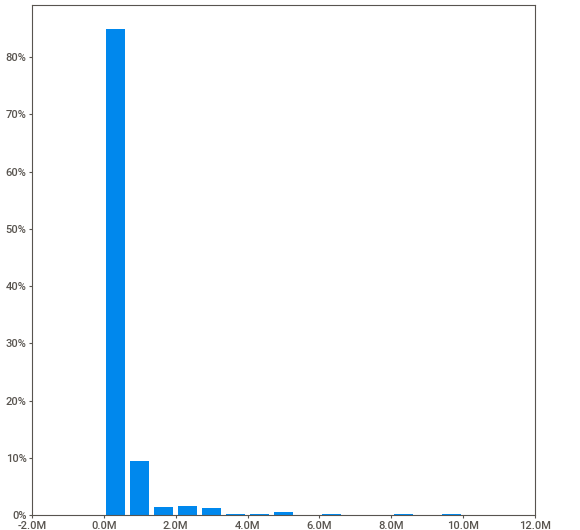
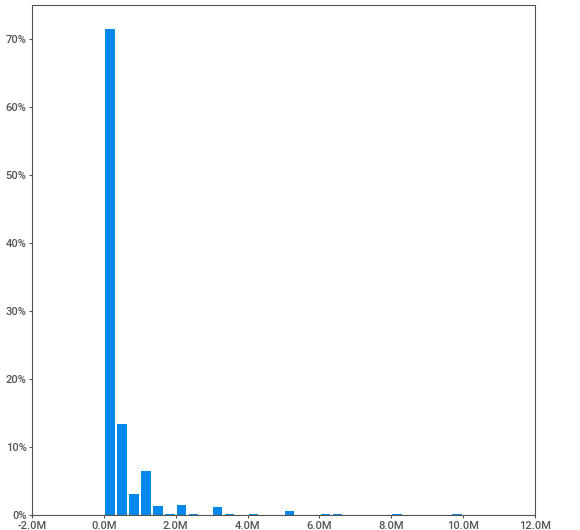
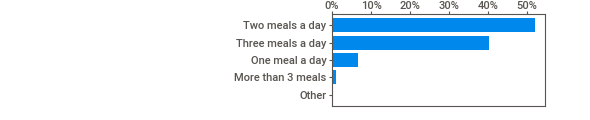
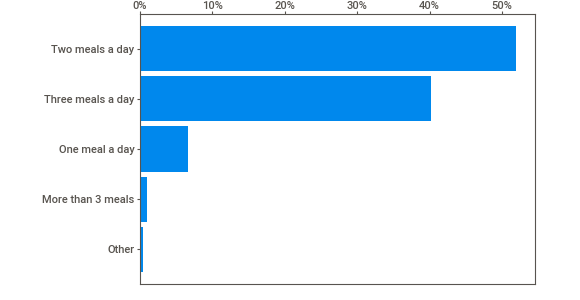
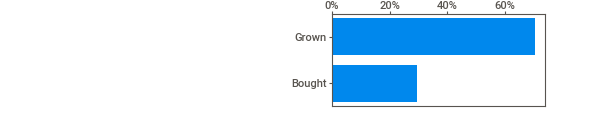
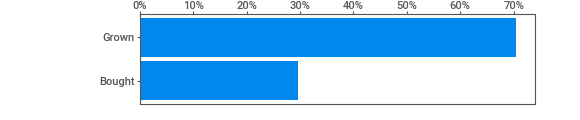
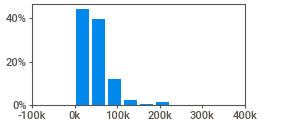
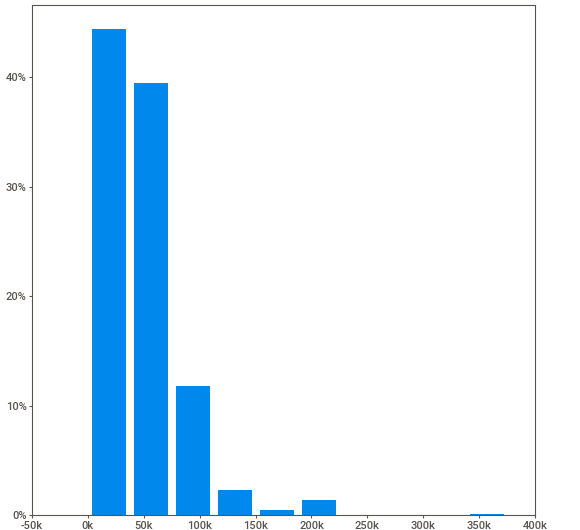
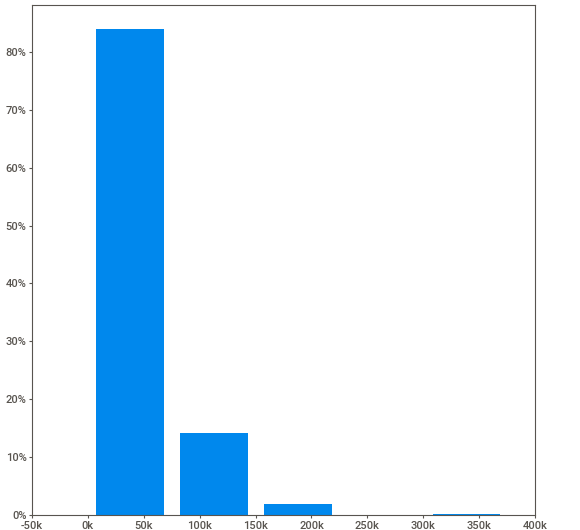
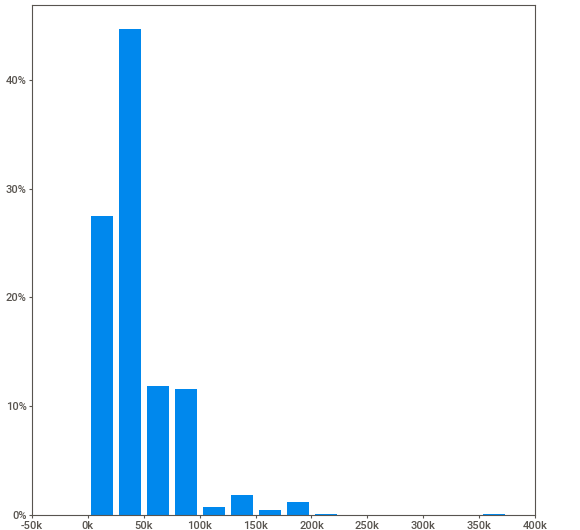
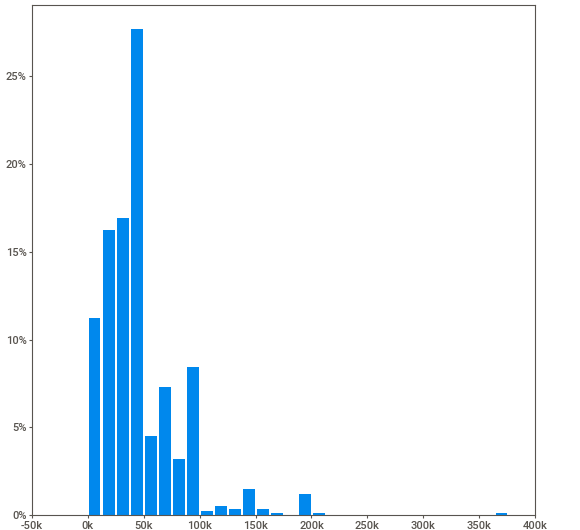
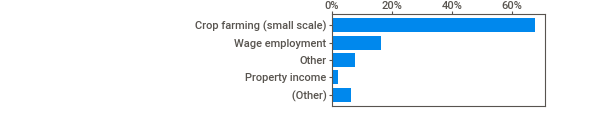
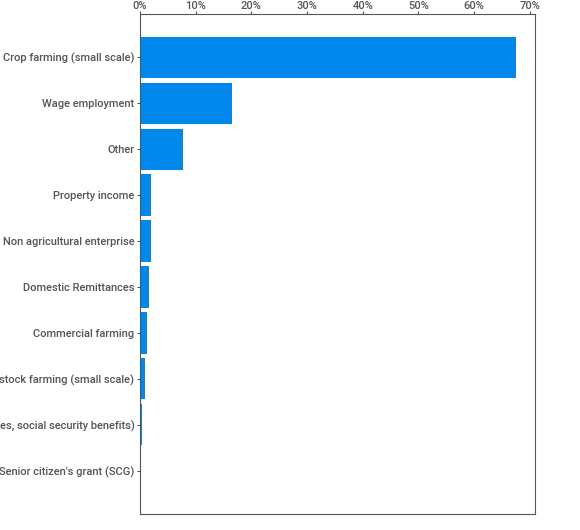
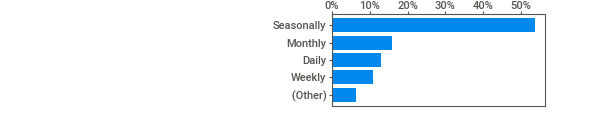
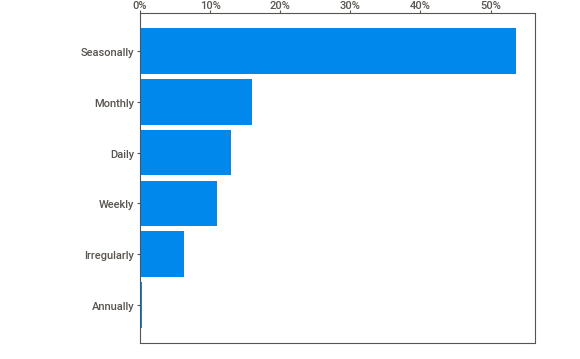
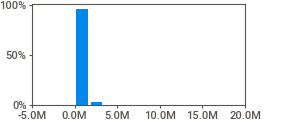
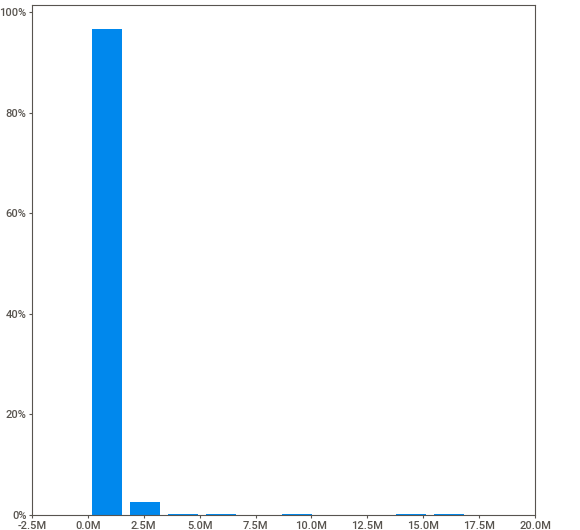
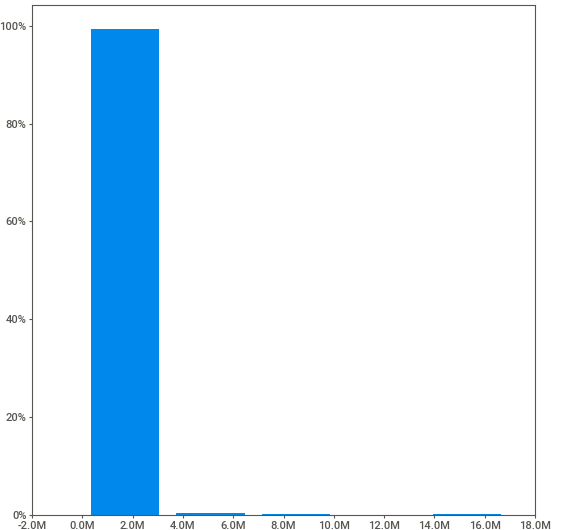
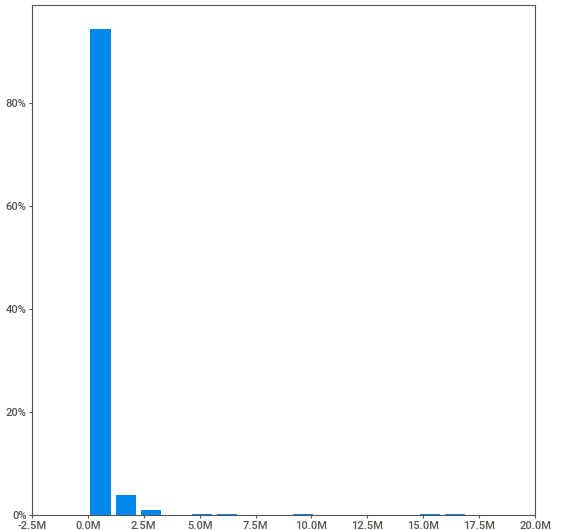
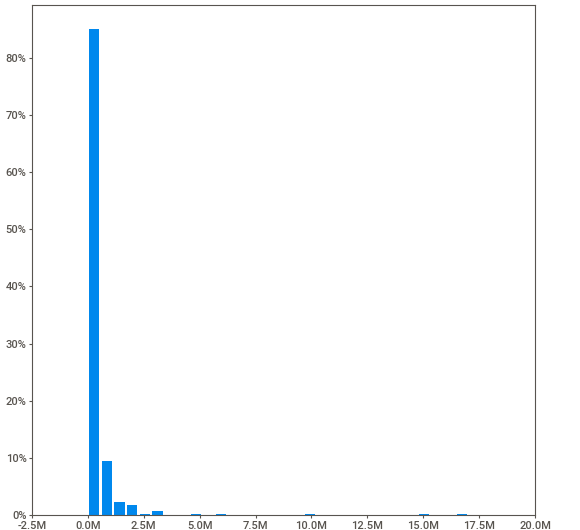
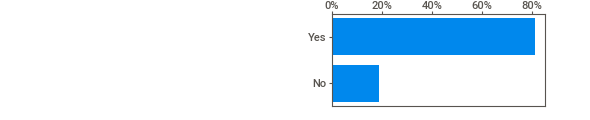
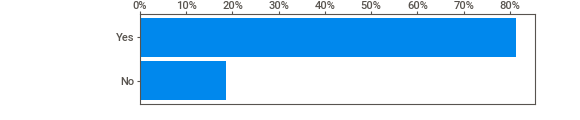
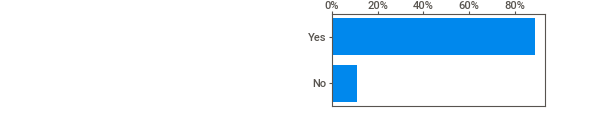
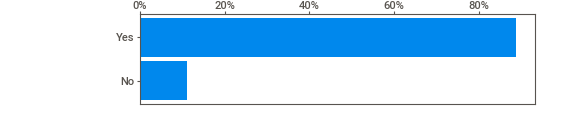
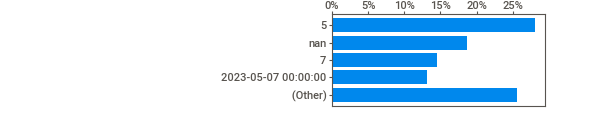
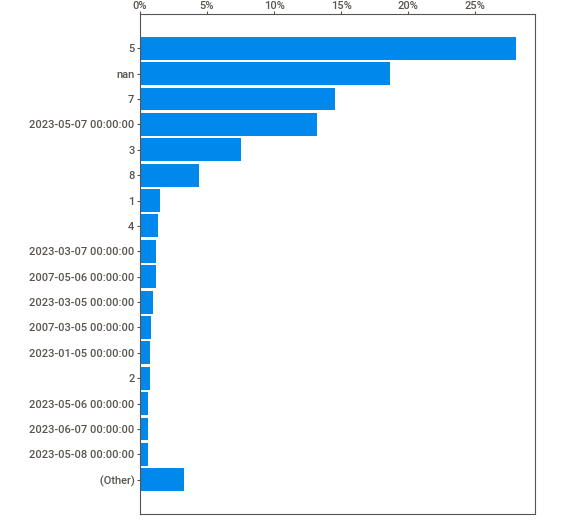
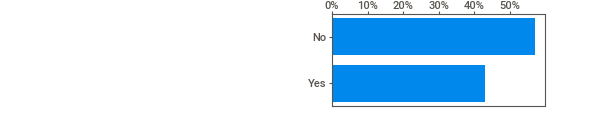
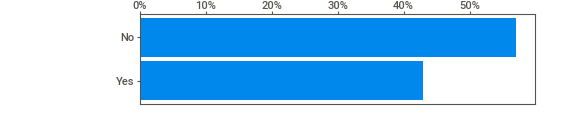
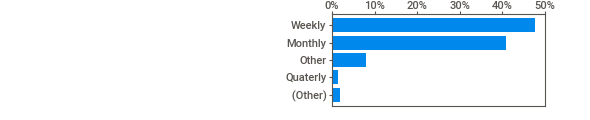
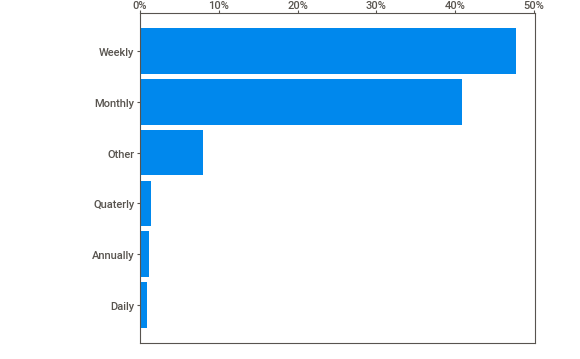
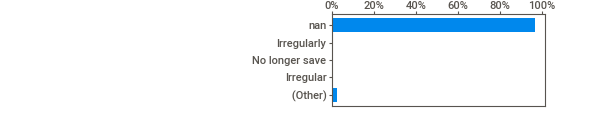
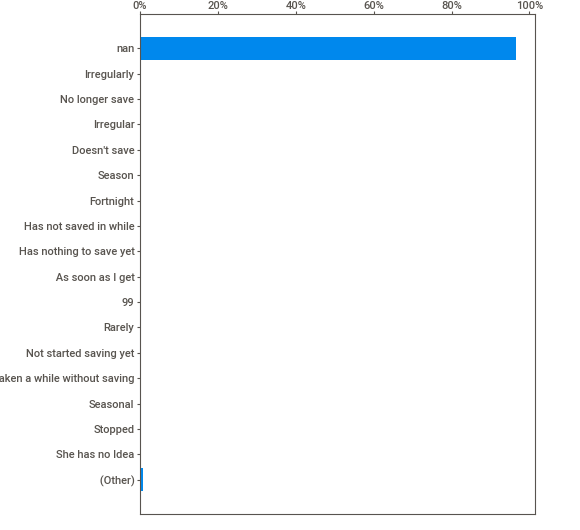
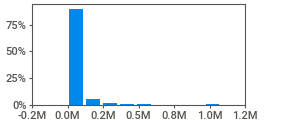
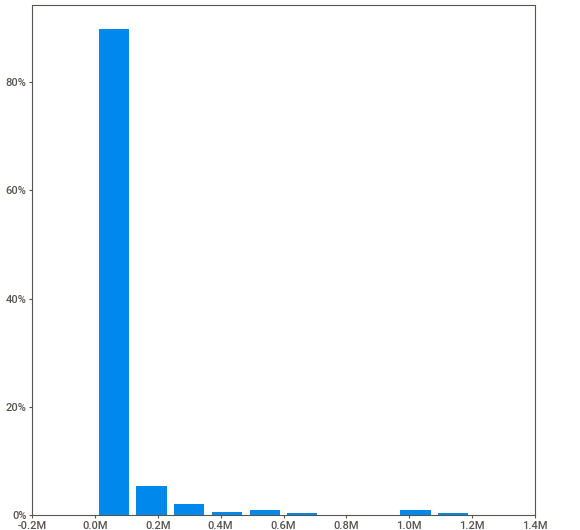
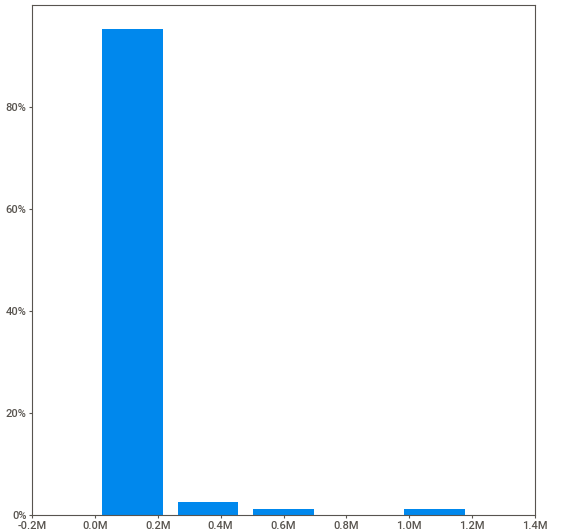
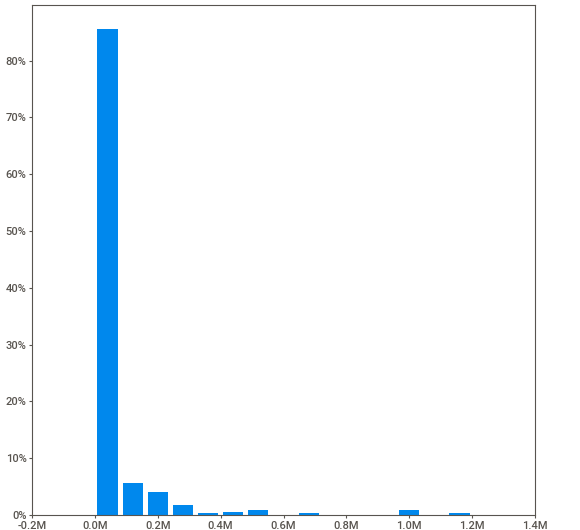
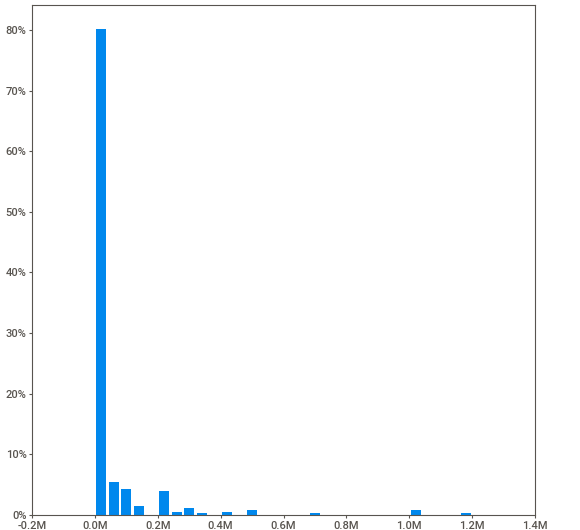
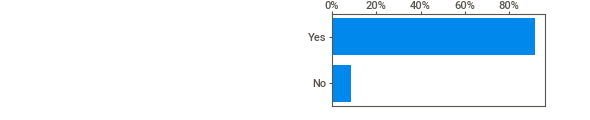
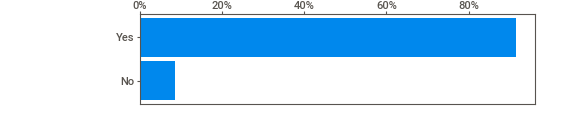
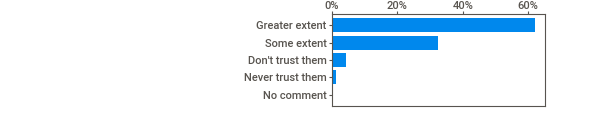
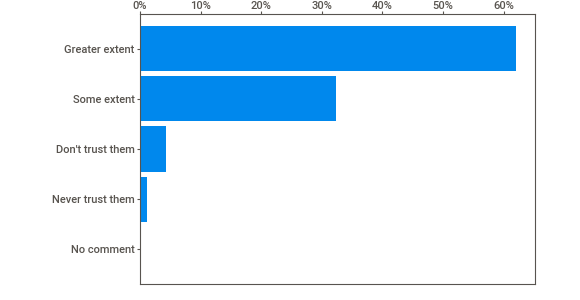
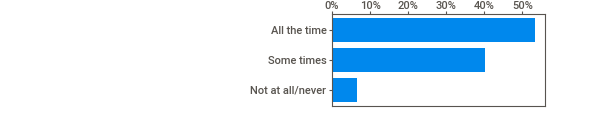
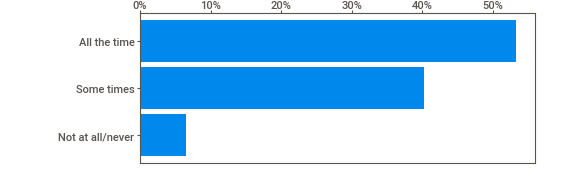
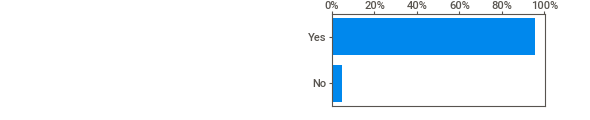
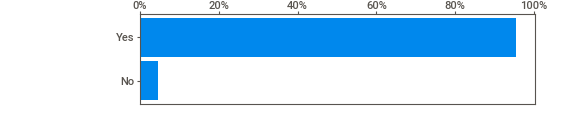
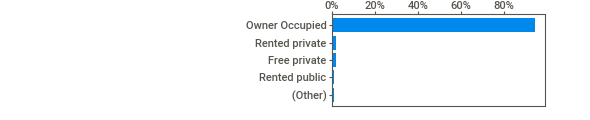
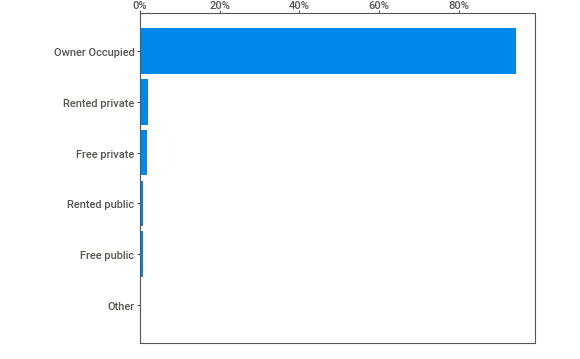
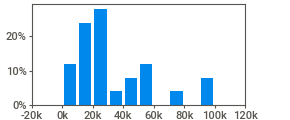
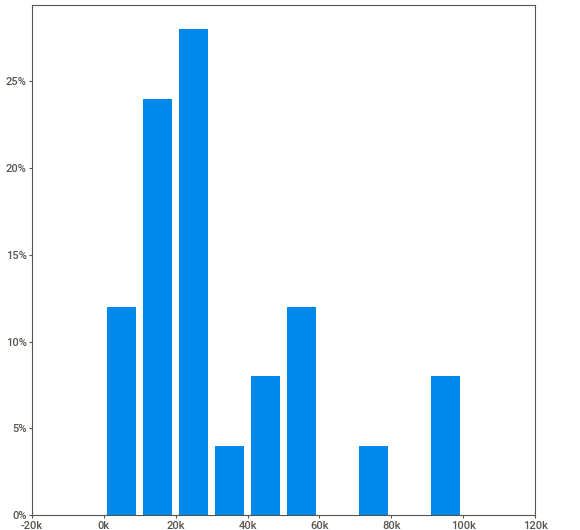
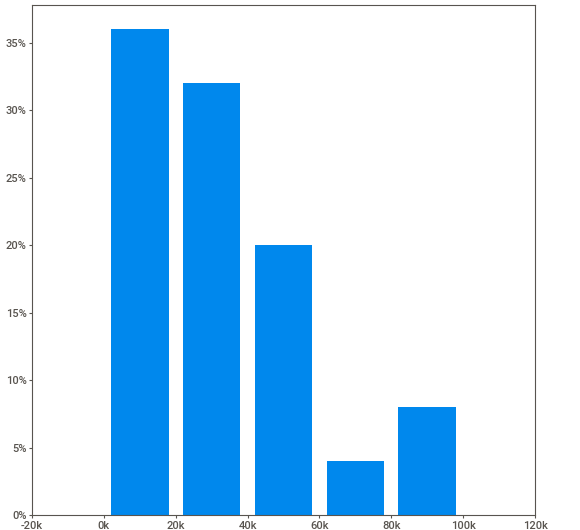
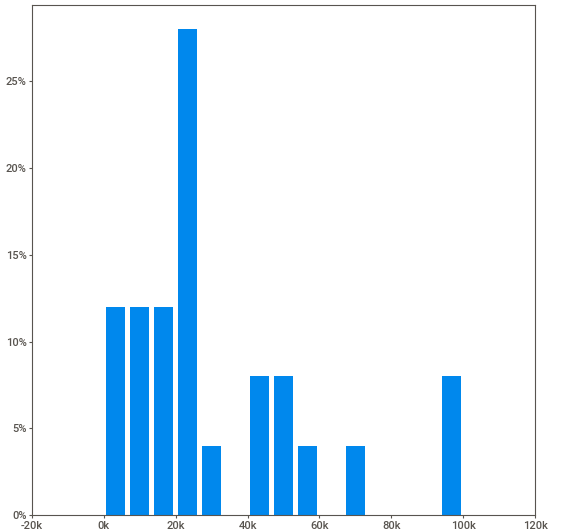
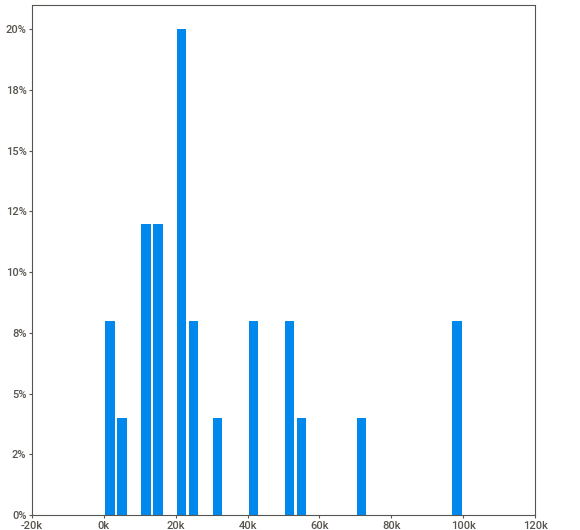
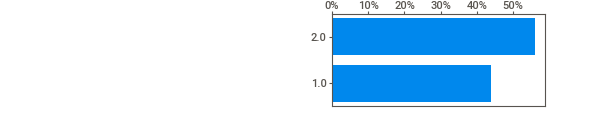
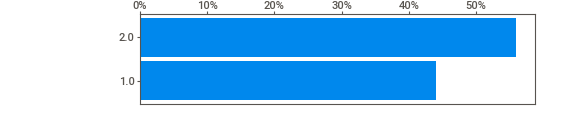
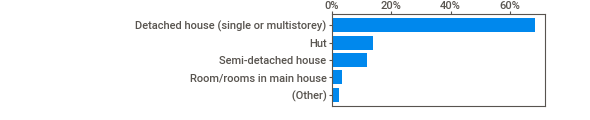
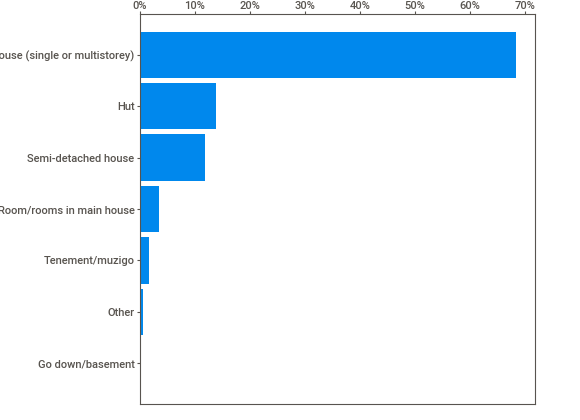
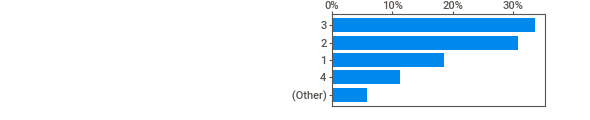
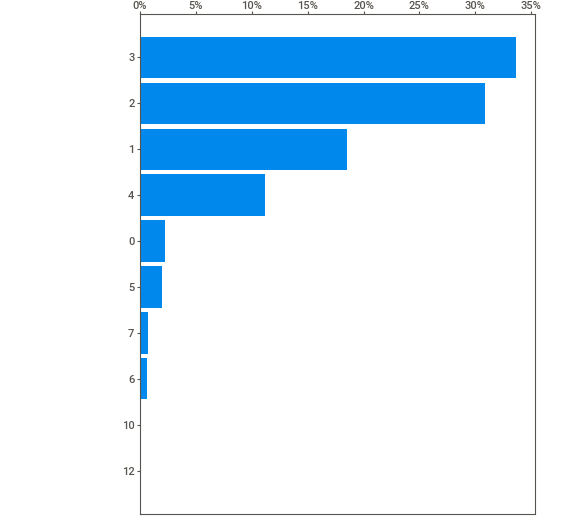
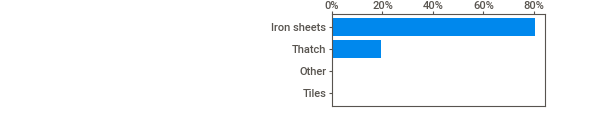
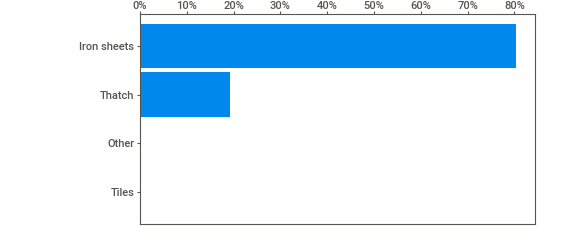
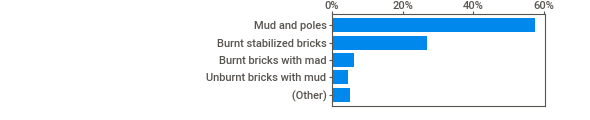
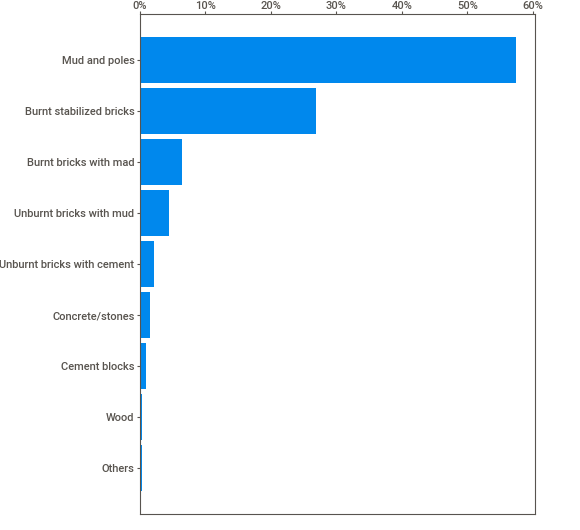
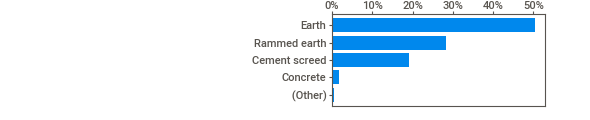
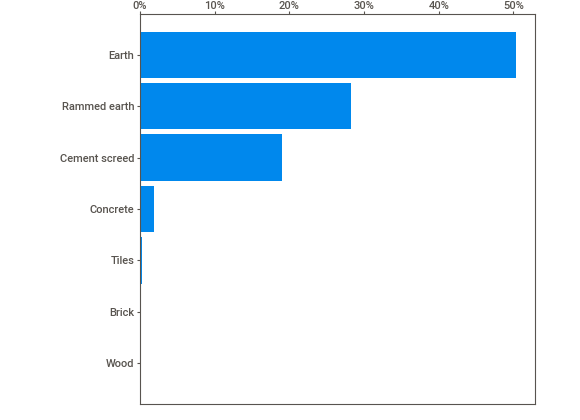
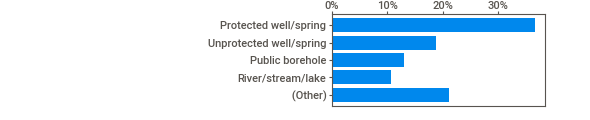
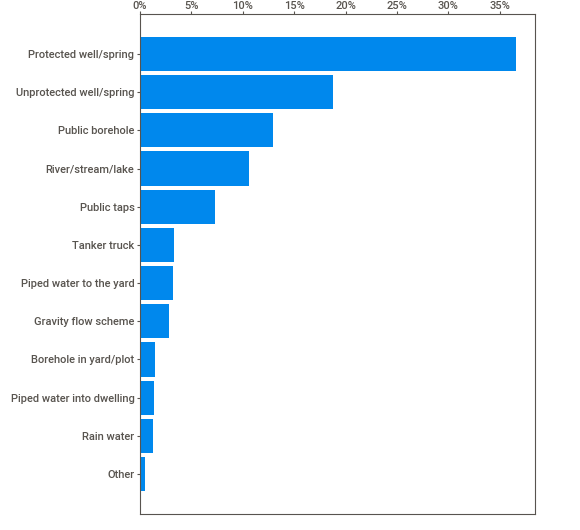
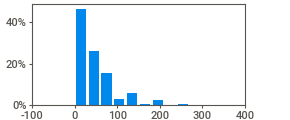
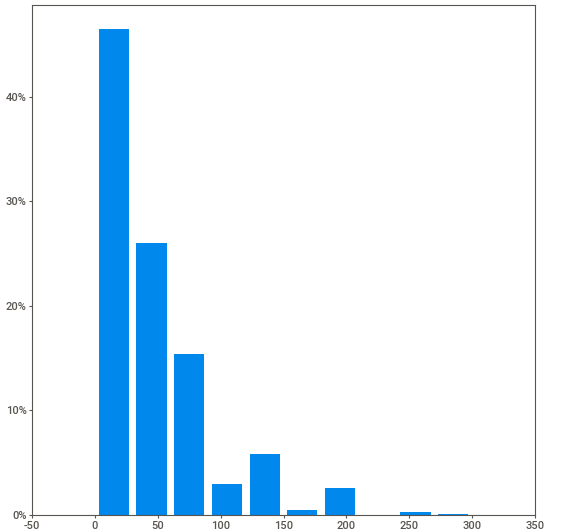
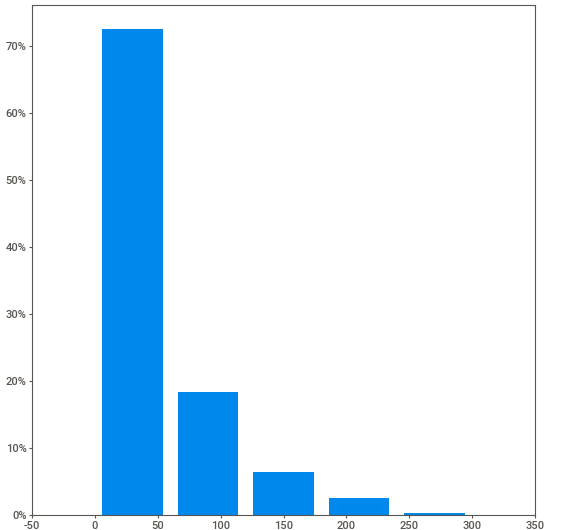
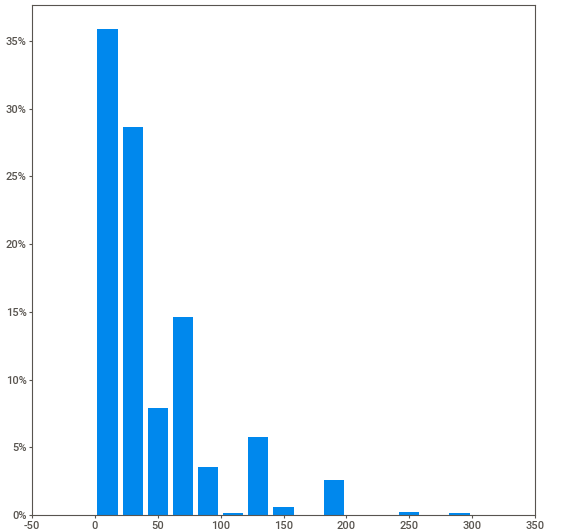
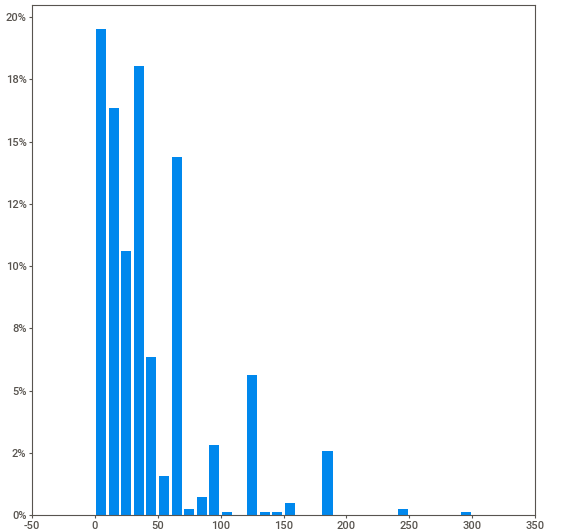
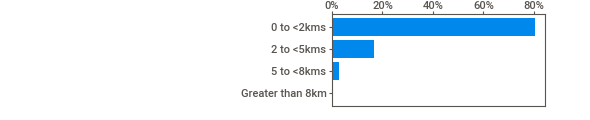
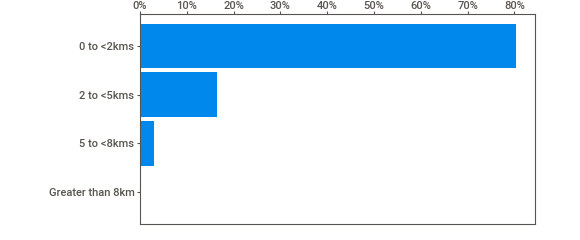
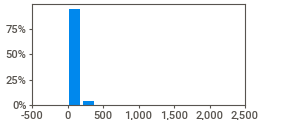
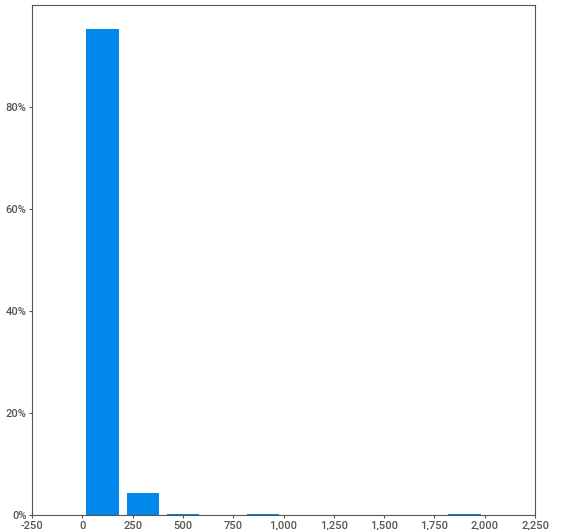
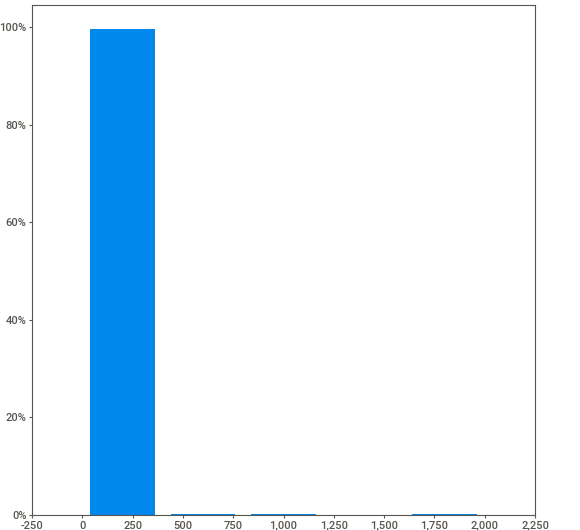
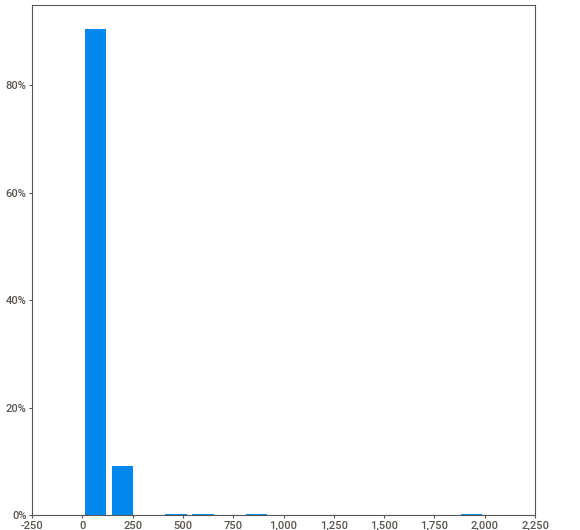
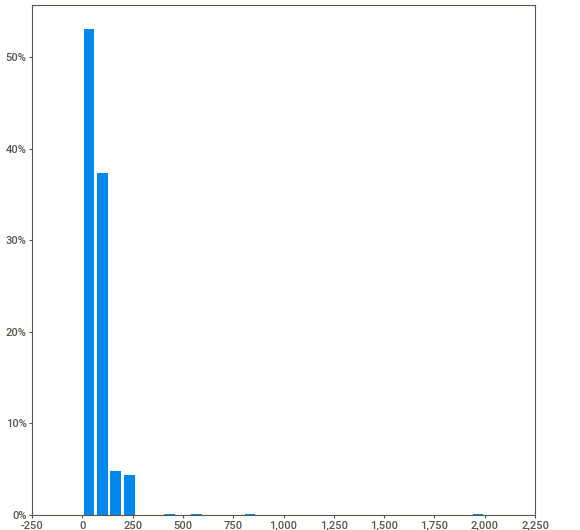
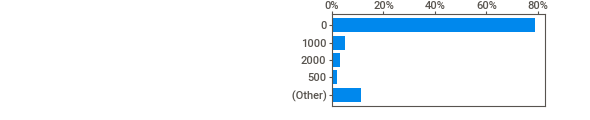
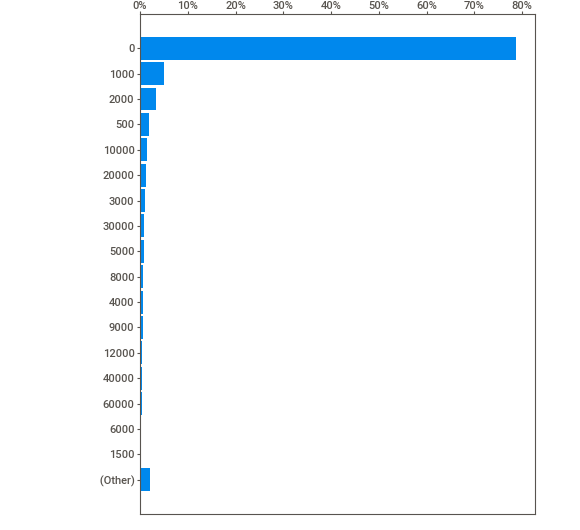
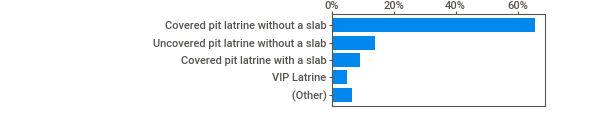
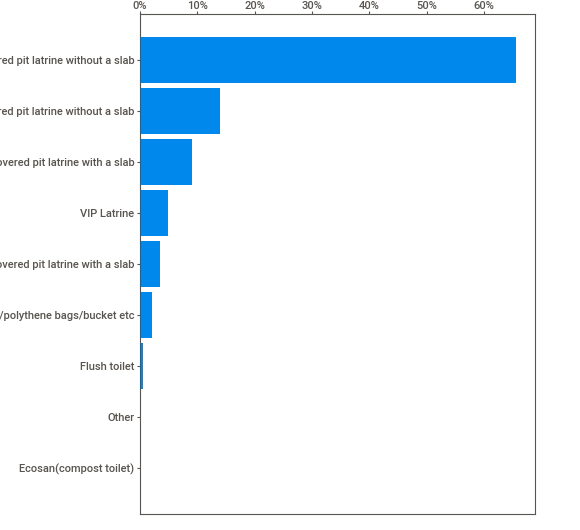
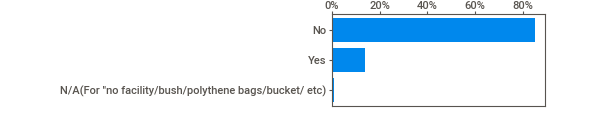
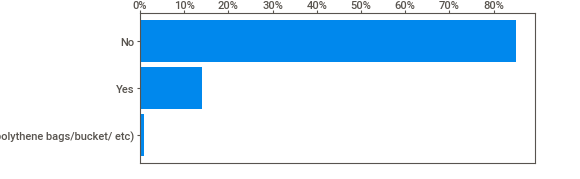
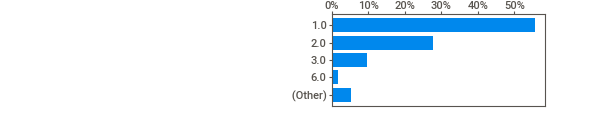
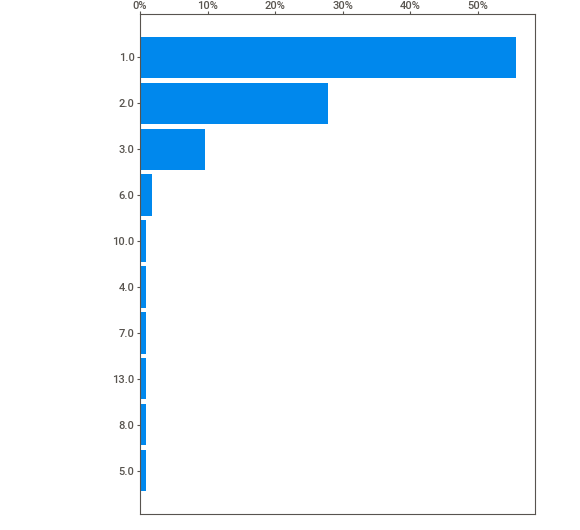
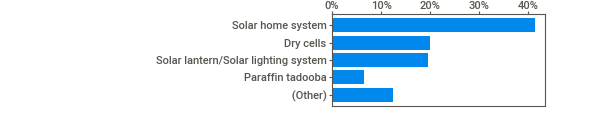
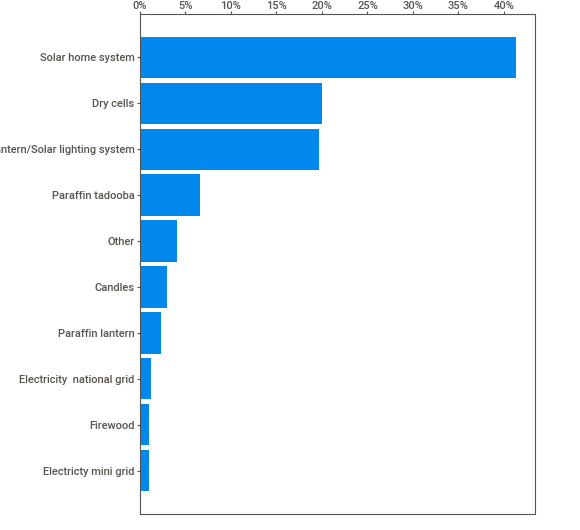
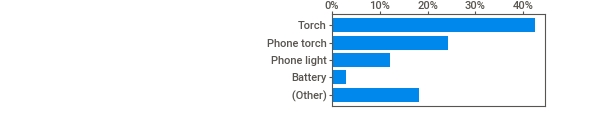
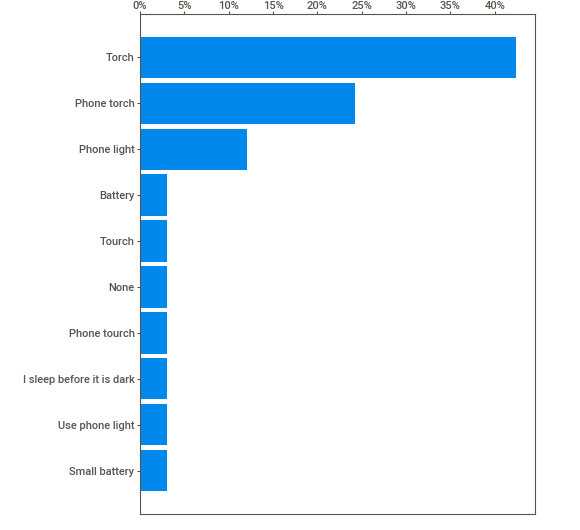
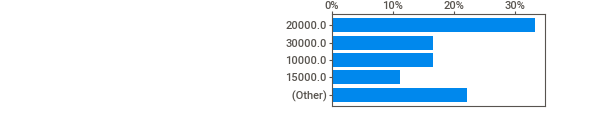
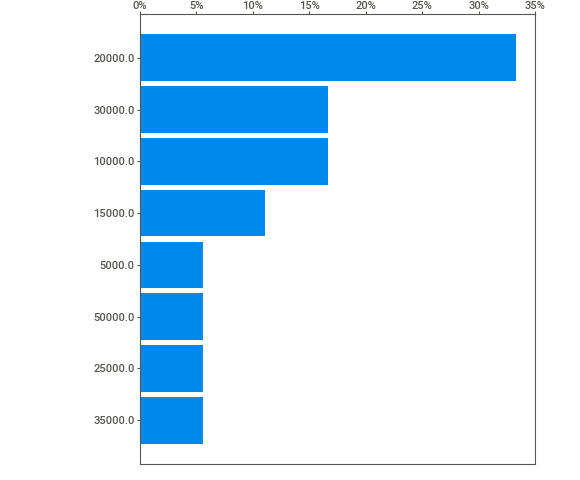
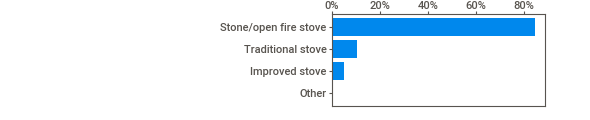
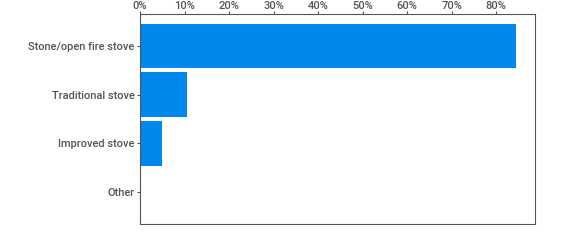
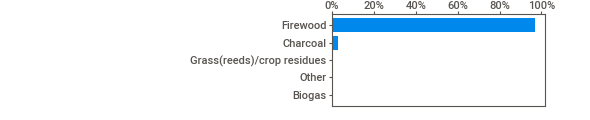
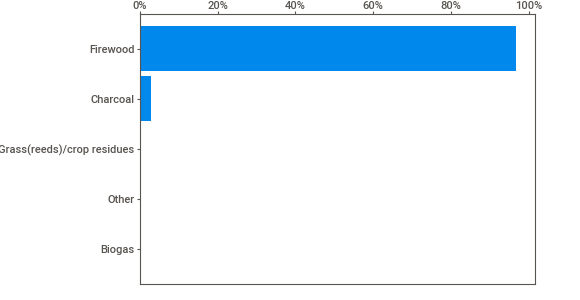
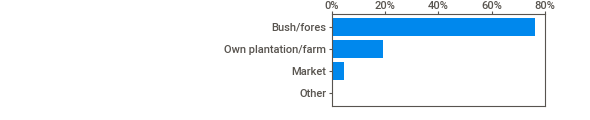
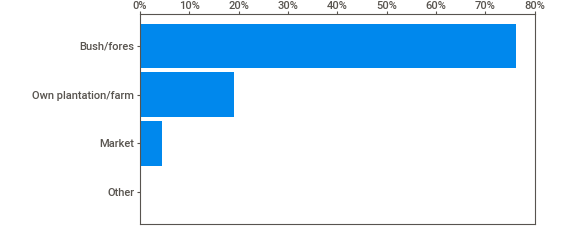
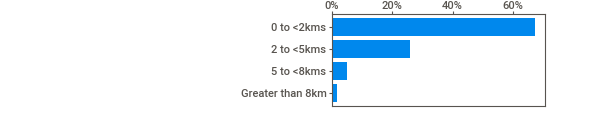
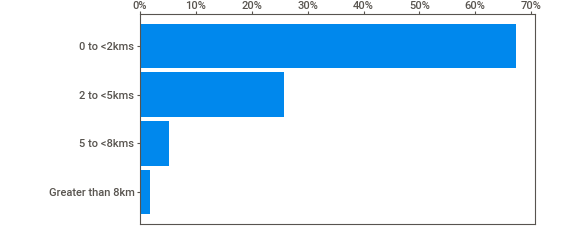
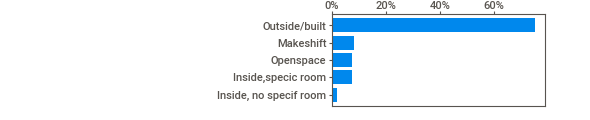
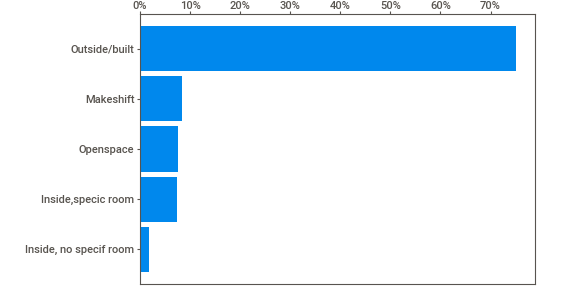
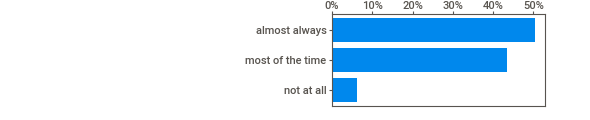
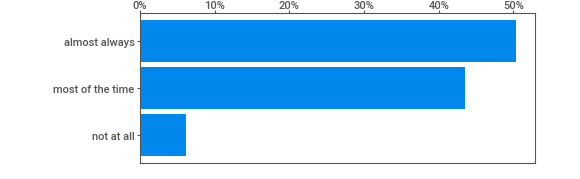
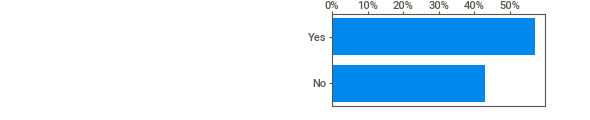
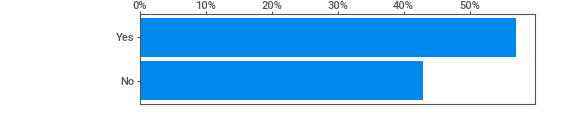
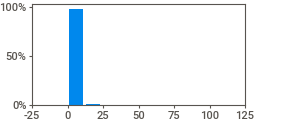
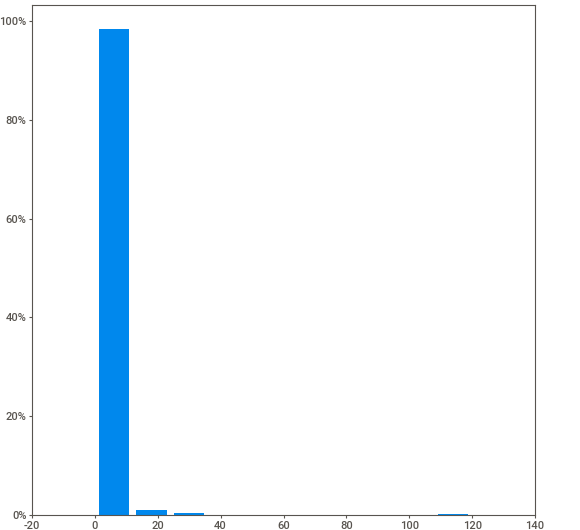
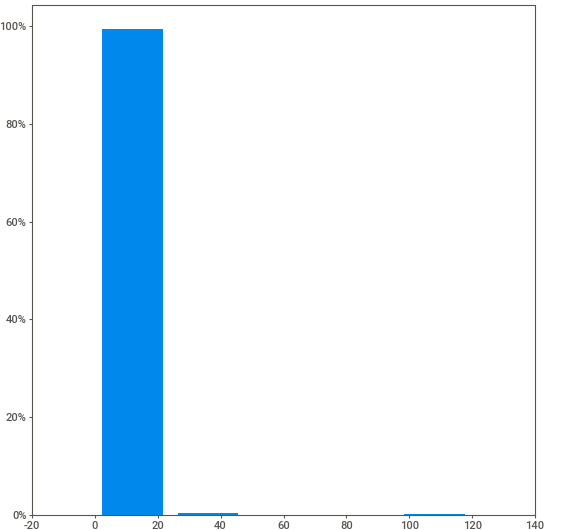
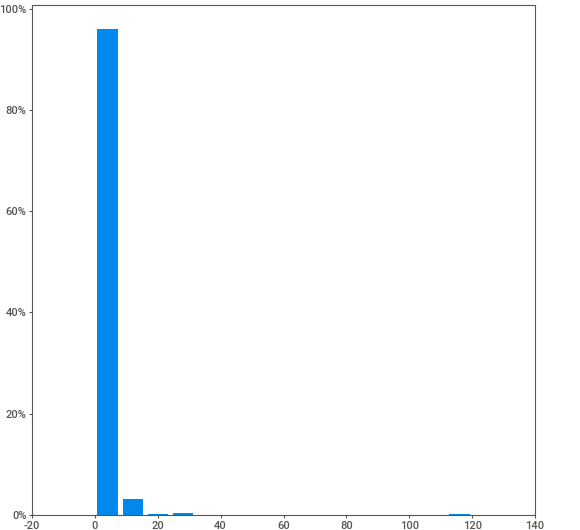
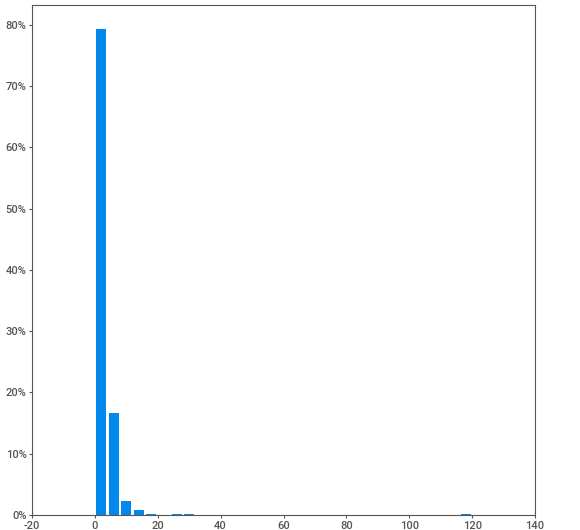
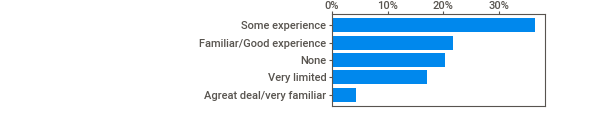
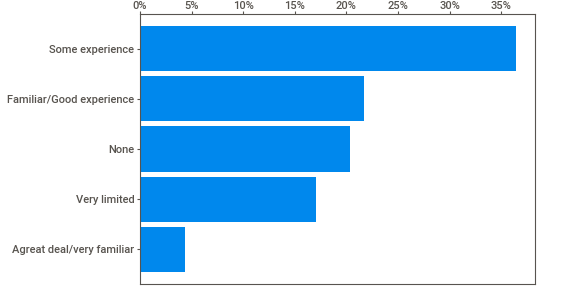
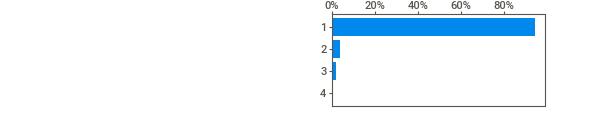
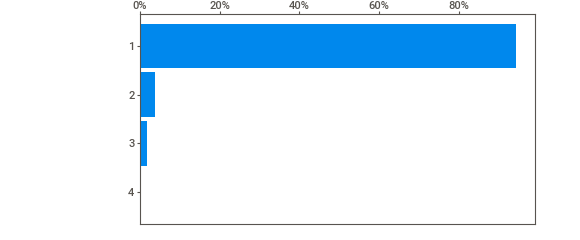
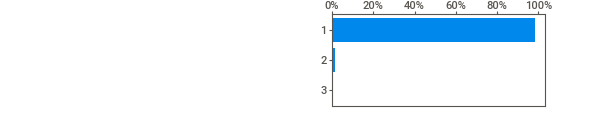
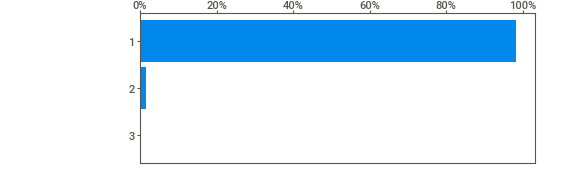
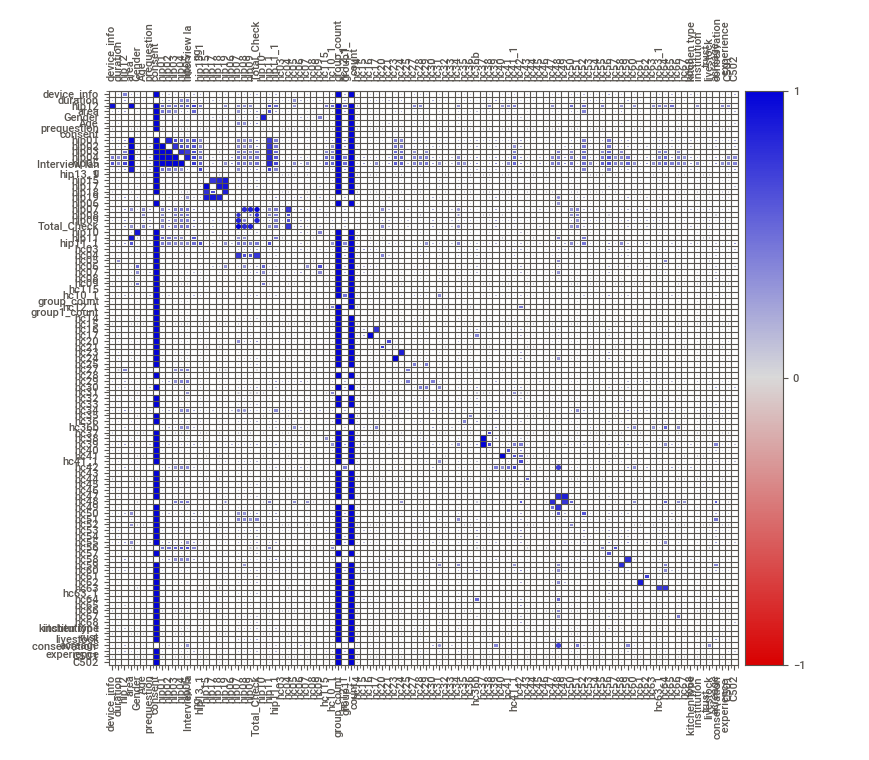
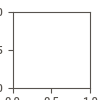

In [4]:
# completeness check
msno.matrix(qual)

# data profiling
Report = sv.analyze(qual)

Report.show_notebook()

In [6]:
# data quality not in html format
from pandas_dq import dq_report
dqr = dq_report(qual, target= None, html=False, csv_engine="pandas", verbose=1)

<Figure size 1000x600 with 0 Axes>

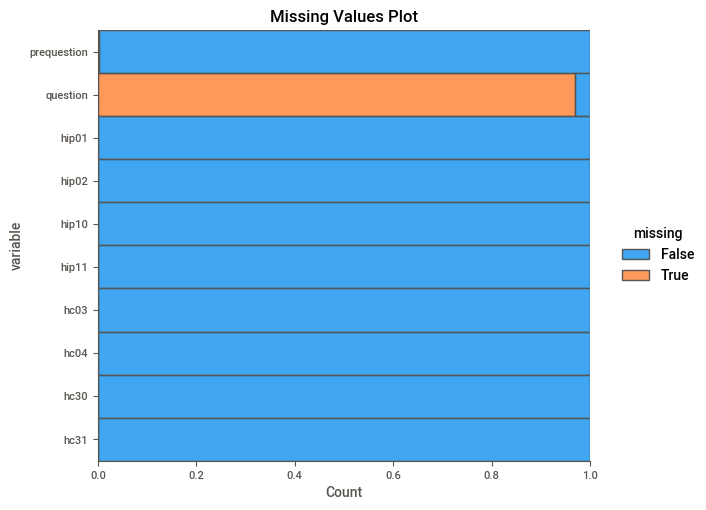

In [8]:
# check for missing values
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot=  ['prequestion', 'question','hip01','hip02','hip10','hip11','hc03','hc04','hc30','hc31']

# create a subset of the DataFrame with the chosen columns
subset = qual[columns_to_plot]

def plot_missing_values(df: pd.DataFrame, 
                        title="Missing Values Plot"):
    plt.figure(figsize=(10, 6))

    sns.displot(
        data=subset.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    plt.title(title)
    plt.show()

plot_missing_values(subset)

Interpretation
From the diagram above, we see that only the question columnn has missing values

In [15]:
# data validation on the data dictionary
from pydantic import BaseModel,conint, condecimal, constr
class BackbonePrefix(BaseModel):
    mask: conint(ge=0, le=31)
    
class LoanApplication(BaseModel):
    hip01: int
    hip02: str
    hip03: str
    hip04: str
    hip05: str
    hip06: object
    hip07: int
    hip08: int
    hip09: int
    hip10: object
    hip11: object
    hc01:  object
    hip07: int
    hip09: object
    # Sample loan application data
loan_application_data = {
    "hip01": 1,
    "hip02": C2,
    "hip03": S3,
    "hip04": P5,
    "hip05": Nyakabingo,
    "hip06": 0,
    "hip07": 8,
    "hip08": 5,
    "": 100000,
    
}
# Validate the data using the LoanApplication Pydantic model
loan_application = LoanApplication(**loan_application_data)
    


RuntimeError: no validator found for <class 'object'>